---
**License**

 NumCosmoCCLTest

 Mon Jun 01 09:20:00 2020\
 Copyright  2020\
 Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 NumCosmoCCLTest\
 Copyright (C) 2020 Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [5]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import pyccl as ccl

import sys
import numpy as np
import math

In [6]:
Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [3]:
import pylab as plt
def compare(x, y_ccl, y_nc, x_name='x', y_name='func', subplots_pars={'figsize':(12, 6)}, xscale = 'linear', yscale = 'log'):
    ccl_name, nc_name = '%s_{clmm}'%y_name, '%s_{nc}'%y_name
    
    x     = np.array (x)
    y_ccl = np.array (y_ccl)  #Aproveitar para fazer gráficos...
    y_nc  = np.array (y_nc)
    diff  = np.zeros_like (y_ccl)
    
    non_zind = np.where (y_ccl != 0.0)[0]
    zind     = np.where (y_ccl == 0.0)[0]
    diff[non_zind] = y_nc[non_zind]/y_ccl[non_zind] - 1.0
    diff[zind]     = y_nc[zind] - y_ccl[zind]
    print('[%10s]: rel diff min: %e\trel diff max: %e'%(y_name, min(abs(diff)), max(abs(diff))))
        
    fig, axs = plt.subplots(2, sharex=True, **subplots_pars)
    fig.subplots_adjust(hspace=0)
    
    axs[0].plot(x, y_ccl, label='ccl', lw=3)
    axs[0].plot(x, y_nc, label='nc')
    axs[1].plot(x, np.abs (diff), c='r')
    #axs[1].axhline(0, ls=':', c='0', lw=.5)
    axs[1].set_xscale (xscale)
    axs[1].set_yscale (yscale)

    axs[0].legend()
    axs[0].set_ylabel('$%s$'%y_name)
    axs[1].set_xlabel('$%s$'%x_name)
    axs[1].set_ylabel('$%s/%s-1$'%(nc_name, ccl_name))
    
    return fig, axs

In [7]:
import pylab as plt
def compare(x, y_ccl, y_nc, x_name='x', y_name='func', subplots_pars={'figsize':(12, 6)}, xscale = 'linear', yscale = 'log'):
    ccl_name, nc_name = '%s_{clmm}'%y_name, '%s_{nc}'%y_name
    
    x     = np.array (x)
    y_ccl = np.array (y_ccl)
    y_nc  = np.array (y_nc)
    diff  = np.zeros_like (y_ccl)
    
    non_zind = np.where (y_ccl != 0.0)[0]
    zind     = np.where (y_ccl == 0.0)[0]
    diff[non_zind] = y_nc[non_zind]/y_ccl[non_zind] - 1.0
    diff[zind]     = y_nc[zind] - y_ccl[zind]
    print('[%10s]: rel diff min: %e\trel diff max: %e'%(y_name, min(abs(diff)), max(abs(diff))))
        
    fig, axs = plt.subplots(2, sharex=True, **subplots_pars)
    fig.subplots_adjust(hspace=0)
    
    axs[0].plot(x, y_ccl, label='ccl', lw=3)
    axs[0].plot(x, y_nc, label='nc')
    axs[1].plot(x, np.abs (diff), c='r')
    #axs[1].axhline(0, ls=':', c='0', lw=.5)
    axs[1].set_xscale (xscale)
    axs[1].set_yscale (yscale)

    axs[0].legend()
    axs[0].set_ylabel('$%s$'%y_name)
    axs[1].set_xlabel('$%s$'%x_name)
    axs[1].set_ylabel('$%s/%s-1$'%(nc_name, ccl_name))
    
    return fig, axs

In [8]:
Omega_c = 0.25
Omega_b = 0.05
Omega_k = 0.0
h       = 0.7
A_s     = 2.1e-9
n_s     = 0.96
Neff    = 0.0
mu_0    = 0.1
sigma_0 = 0.1

Omega_v_vals = np.array([0.7, 0.7, 0.7, 0.65, 0.75])
w0_vals      = np.array([-1.0, -0.9, -0.9, -0.9, -0.9])
wa_vals      = np.array([0.0, 0.0, 0.1, 0.1, 0.1])

mnu = [
    [0.04, 0., 0.], [0.05, 0.01, 0.], [0.05, 0., 0.],
    [0.03, 0.02, 0.]]
Neff_mnu = 3.0


### Set up array of ells

In [9]:
lmax = 10000
nls = (lmax - 400) // 20 + 141
ells = np.zeros(nls)
ells[:101] = np.arange(101)
ells[101:121] = ells[100] + (np.arange(20) + 1) * 5
ells[121:141] = ells[120] + (np.arange(20) + 1) * 10
ells[141:] = ells[140] + (np.arange(nls - 141) + 1) * 20

Simplified model of the CCL cross-correlation test using the only tracer that had the test with spin-0 ('NN'), in other words, the NumberCountTracer for g1,g2.

In [10]:
import pyccl as ccl
import numpy as np
from scipy.interpolate import interp1d

#methods = ['fftlog','bessel']
#nztyp = ['analytic','histo']
#trc_typ = ['g1','g2'] <--'NN' is standard correlation type
def ccl_correlation(trc, ells, nztyp='analytic',method='bessel'):
    if trc not in ['g1','g2']:
        raise ValueError("Trc_typ invalid", trc)
        
    # Histogram case
    
    z1 = [0.51125,0.51875,0.52625,0.5337500000000001,0.54125,0.5487500000000001,0.55625,0.5637500000000001,0.57125,0.57875,0.58625,0.59375,0.6012500000000001,0.60875,0.6162500000000001,0.62375,0.63125,0.63875,0.64625,0.65375,0.66125,0.6687500000000001,0.67625,0.6837500000000001,0.69125,0.69875,0.70625,0.71375,0.7212500000000001,0.72875,0.7362500000000001,0.74375,0.7512500000000001,0.75875,0.76625,0.77375,0.78125,0.7887500000000001,0.79625,0.8037500000000001,0.81125,0.81875,0.82625,0.83375,0.84125,0.84875,0.8562500000000001,0.86375,0.8712500000000001,0.87875,0.88625,0.89375,0.90125,0.9087500000000001,0.91625,0.9237500000000001,0.93125,0.9387500000000001,0.94625,0.95375,0.96125,0.96875,0.9762500000000001,0.98375,0.9912500000000001,0.99875,1.0062499999999999,1.01375,1.02125,1.0287499999999998,1.03625,1.04375,1.05125,1.0587499999999999,1.06625,1.07375,1.0812499999999998,1.0887499999999999,1.09625,1.10375,1.1112499999999998,1.11875,1.12625,1.1337499999999998,1.1412499999999999,1.14875,1.15625,1.1637499999999998,1.17125,1.17875,1.18625,1.1937499999999999,1.20125,1.20875,1.2162499999999998,1.22375,1.23125,1.23875,1.2462499999999999,1.25375,1.26125,1.2687499999999998,1.2762499999999999,1.28375,1.29125,1.2987499999999998,1.30625,1.31375,1.3212499999999998,1.3287499999999999,1.33625,1.34375,1.3512499999999998,1.35875,1.36625,1.37375,1.3812499999999999,1.38875,1.39625,1.4037499999999998,1.41125,1.41875,1.42625,1.4337499999999999,1.44125,1.44875,1.4562499999999998,1.4637499999999999,1.47125,1.47875,1.4862499999999998,1.49375,1.50125,1.5087499999999998,1.5162499999999999,1.52375,1.53125,1.5387499999999998,1.54625,1.55375,1.56125,1.5687499999999999,1.57625,1.58375,1.5912499999999998,1.59875,1.60625,1.61375,1.6212499999999999,1.62875,1.63625,1.6437499999999998,1.6512499999999999,1.65875,1.66625,1.6737499999999998,1.68125,1.68875,1.6962499999999998,1.7037499999999999,1.71125,1.71875,1.7262499999999998,1.73375,1.74125,1.74875,1.7562499999999999,1.76375,1.77125,1.7787499999999998,1.78625,1.79375,1.80125,1.8087499999999999,1.81625,1.82375,1.8312499999999998,1.8387499999999999,1.84625,1.85375,1.8612499999999998,1.86875,1.87625,1.8837499999999998,1.8912499999999999,1.89875,1.90625,1.9137499999999998,1.92125,1.92875,1.93625,1.9437499999999999,1.95125,1.95875,1.9662499999999998,1.97375,1.98125,1.98875,1.9962499999999999]
    pz1 = [0.03042845,0.03414402,0.03799253,0.04299767,0.05033486,0.06090954,0.07214195,0.08122409,0.09440498,0.1069006,0.1193231,0.1345755,0.1574345,0.1814089,0.2129027,0.2362395,0.2668045,0.3002025,0.3352957,0.3745351,0.4194854,0.4623063,0.5050753,0.5454309,0.5963121,0.6618579,0.7288298,0.8091178,0.898688,0.9962031,1.104119,1.216311,1.32999,1.435197,1.512844,1.58501,1.652862,1.703158,1.741018,1.772948,1.774767,1.763834,1.737957,1.726589,1.737972,1.753971,1.763453,1.802562,1.856402,1.900287,1.9703,2.067721,2.174633,2.281516,2.373034,2.444509,2.524466,2.565968,2.591811,2.636548,2.668677,2.667052,2.662519,2.650229,2.636122,2.642808,2.631578,2.617414,2.585296,2.516713,2.433994,2.371482,2.312537,2.243322,2.161209,2.053728,1.949206,1.849159,1.756659,1.680961,1.607236,1.512338,1.403549,1.296255,1.194675,1.099351,1.006349,0.9175507,0.8346777,0.7518989,0.6750844,0.6090778,0.5471522,0.4921195,0.4383578,0.3932878,0.3505944,0.3069157,0.2660076,0.2260665,0.1912351,0.1602497,0.1342543,0.1105429,0.09371526,0.07828563,0.06450086,0.05691218,0.05188841,0.04927132,0.04626028,0.04556604,0.04560567,0.04429971,0.04462289,0.04330885,0.04531251,0.04556658,0.04682577,0.04804921,0.05014561,0.05017483,0.04971365,0.0498952,0.05009804,0.05045293,0.05051581,0.05173462,0.05239803,0.05211333,0.05046592,0.04824938,0.04685445,0.04832953,0.04773316,0.04719018,0.04581053,0.04330763,0.04180981,0.0409335,0.03975677,0.03999396,0.04020634,0.04043189,0.03879762,0.03973875,0.03834657,0.03841882,0.03693463,0.03597824,0.03656528,0.03627733,0.0368738,0.03706237,0.03943152,0.03926759,0.04037174,0.04044818,0.04122869,0.04159501,0.0407858,0.04100093,0.03983945,0.03702105,0.035423,0.03340422,0.03194788,0.0302819,0.02866295,0.0283969,0.02863473,0.02794187,0.02742471,0.02713259,0.02723712,0.02731734,0.02779379,0.02876089,0.02951878,0.0293301,0.02866049,0.02870192,0.02811025,0.02743557,0.0259726,0.02577944,0.02464586,0.02338112,0.0217144,0.02120506,0.02094031,0.01955321,0.01917961,0.01865226,0.01782826,0.01645653,0.01553533,0.01498327,0.01385961]
    pz2 = [0.02052227,0.02128476,0.02239694,0.02465136,0.02586701,0.03179429,0.03392884,0.0367469,0.04154996,0.04243694,0.04518474,0.04727245,0.05213725,0.06062088,0.06824402,0.07278402,0.08242115,0.09059329,0.09545925,0.1037852,0.1127547,0.1194203,0.1214864,0.1178928,0.1201941,0.1196488,0.1201862,0.1167615,0.1193688,0.1208544,0.1229058,0.1242607,0.1239687,0.1270272,0.1243528,0.1200976,0.1130248,0.1113359,0.1040341,0.09660113,0.08767327,0.08330837,0.07821314,0.07217775,0.06684813,0.06545177,0.06539616,0.06688858,0.06832995,0.06796344,0.07096691,0.07170753,0.07706039,0.08479357,0.09471338,0.1036854,0.1107307,0.1190918,0.1282902,0.1383972,0.1526025,0.1626396,0.1764611,0.1898772,0.1983843,0.2129817,0.2242674,0.2358476,0.2481126,0.2667389,0.2783668,0.3034779,0.3362693,0.3685216,0.4165157,0.4673775,0.521112,0.5931014,0.6609077,0.7264559,0.7962301,0.8749996,0.9607969,1.056802,1.156963,1.256299,1.378734,1.510344,1.672523,1.851898,2.039046,2.210871,2.363395,2.487797,2.587954,2.669776,2.745778,2.766685,2.737778,2.669233,2.582152,2.480724,2.370255,2.269433,2.185606,2.102805,1.983777,1.888873,1.804964,1.731546,1.668124,1.623094,1.573137,1.527214,1.473416,1.422128,1.393125,1.351983,1.336813,1.346803,1.351484,1.340388,1.352429,1.367506,1.368783,1.370403,1.377519,1.385641,1.385694,1.353968,1.30617,1.262473,1.210346,1.161107,1.115958,1.081432,1.041388,1.007879,0.9826291,0.9673974,0.9631128,0.9654323,0.9540624,0.9355531,0.9179233,0.9064376,0.8738709,0.8401182,0.7926394,0.7452493,0.7113778,0.6816197,0.665836,0.6483249,0.6367261,0.6235866,0.6165185,0.6122504,0.6033517,0.5971109,0.5756226,0.54784,0.5118714,0.4759495,0.4347915,0.3872084,0.348376,0.3066147,0.2736164,0.2427426,0.22066,0.2012315,0.1880263,0.1787777,0.1752531,0.1687745,0.1658762,0.165598,0.1634433,0.1612935,0.1563185,0.1494878,0.1408261,0.1306753,0.1201645,0.1131836,0.1053328,0.09754543,0.08818486,0.07864627,0.07041585,0.06252,0.05618527,0.05119691,0.04662244,0.0394575,0.03291768,0.02839416,0.02382886]
    z2 = [0.51125,0.51875,0.52625,0.5337500000000001,0.54125,0.5487500000000001,0.55625,0.5637500000000001,0.57125,0.57875,0.58625,0.59375,0.6012500000000001,0.60875,0.6162500000000001,0.62375,0.63125,0.63875,0.64625,0.65375,0.66125,0.6687500000000001,0.67625,0.6837500000000001,0.69125,0.69875,0.70625,0.71375,0.7212500000000001,0.72875,0.7362500000000001,0.74375,0.7512500000000001,0.75875,0.76625,0.77375,0.78125,0.7887500000000001,0.79625,0.8037500000000001,0.81125,0.81875,0.82625,0.83375,0.84125,0.84875,0.8562500000000001,0.86375,0.8712500000000001,0.87875,0.88625,0.89375,0.90125,0.9087500000000001,0.91625,0.9237500000000001,0.93125,0.9387500000000001,0.94625,0.95375,0.96125,0.96875,0.9762500000000001,0.98375,0.9912500000000001,0.99875,1.0062499999999999,1.01375,1.02125,1.0287499999999998,1.03625,1.04375,1.05125,1.0587499999999999,1.06625,1.07375,1.0812499999999998,1.0887499999999999,1.09625,1.10375,1.1112499999999998,1.11875,1.12625,1.1337499999999998,1.1412499999999999,1.14875,1.15625,1.1637499999999998,1.17125,1.17875,1.18625,1.1937499999999999,1.20125,1.20875,1.2162499999999998,1.22375,1.23125,1.23875,1.2462499999999999,1.25375,1.26125,1.2687499999999998,1.2762499999999999,1.28375,1.29125,1.2987499999999998,1.30625,1.31375,1.3212499999999998,1.3287499999999999,1.33625,1.34375,1.3512499999999998,1.35875,1.36625,1.37375,1.3812499999999999,1.38875,1.39625,1.4037499999999998,1.41125,1.41875,1.42625,1.4337499999999999,1.44125,1.44875,1.4562499999999998,1.4637499999999999,1.47125,1.47875,1.4862499999999998,1.49375,1.50125,1.5087499999999998,1.5162499999999999,1.52375,1.53125,1.5387499999999998,1.54625,1.55375,1.56125,1.5687499999999999,1.57625,1.58375,1.5912499999999998,1.59875,1.60625,1.61375,1.6212499999999999,1.62875,1.63625,1.6437499999999998,1.6512499999999999,1.65875,1.66625,1.6737499999999998,1.68125,1.68875,1.6962499999999998,1.7037499999999999,1.71125,1.71875,1.7262499999999998,1.73375,1.74125,1.74875,1.7562499999999999,1.76375,1.77125,1.7787499999999998,1.78625,1.79375,1.80125,1.8087499999999999,1.81625,1.82375,1.8312499999999998,1.8387499999999999,1.84625,1.85375,1.8612499999999998,1.86875,1.87625,1.8837499999999998,1.8912499999999999,1.89875,1.90625,1.9137499999999998,1.92125,1.92875,1.93625,1.9437499999999999,1.95125,1.95875,1.9662499999999998,1.97375,1.98125,1.98875,1.9962499999999999]
    z1 = np.array(z1)
    z2 = np.array(z2)
    
    ##NumCosmo
    w0 = -1.0
    wa = 0.0
    
    cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, "NcHICosmoDECpl{'massnu-length':<0>}")
    cosmo.omega_x2omega_k ()
    cosmo.param_set_by_name ("H0",        h * 100)
    cosmo.param_set_by_name ("Omegak",    0.0)
    cosmo.param_set_by_name ("w0",        w0)
    cosmo.param_set_by_name ("w1",        wa)
    cosmo.param_set_by_name ("Omegab",    Omega_b)
    cosmo.param_set_by_name ("Omegac",    Omega_c)
    cosmo.param_set_by_name ("ENnu",      Neff)
        
    # Set Omega_K in a consistent way
    Omega_k = cosmo.Omega_k0 ()
    Omega_v = cosmo.E2Omega_de (0.0)
    T_CMB   = cosmo.T_gamma0 ()
    
    hiprim = Nc.HIPrimPowerLaw.new ()
    hiprim.param_set_by_name ("ln10e10ASA", math.log (1.0e10 * A_s))
    hiprim.param_set_by_name ("n_SA",       n_s)
    
    cosmo.add_submodel (hiprim)
    
    dist = Nc.Distance.new (5.0)
    dist.prepare (cosmo)
    
    tf_eh = Nc.TransferFuncEH.new ()
    tf_eh.props.CCL_comp = True
    ps_eh = Nc.PowspecMLTransfer.new (tf_eh)
    ps_eh.prepare (cosmo)

    fact = (0.8 / ps_eh.sigma_tophat_R (cosmo, 1.0e-7, 0.0, 8.0 / cosmo.h ()))**2
    hiprim.param_set_by_name ("ln10e10ASA", math.log (1.0e10 * A_s * fact))

    ps_eh.prepare (cosmo)
    
    mset = Ncm.MSet.empty_new ()
    mset.set (cosmo)
    
    ccl_cosmo = ccl.Cosmology(
        Omega_c=Omega_c, Omega_b=Omega_b, Neff=Neff,
        h=h, n_s=n_s, Omega_k=Omega_k,
        w0=w0, wa=wa, Omega_g=0, sigma8 = 0.8,
        transfer_function='eisenstein_hu',
        T_CMB = T_CMB,
        matter_power_spectrum='linear')

    ccl_cosmo.cosmo.gsl_params.INTEGRATION_LIMBER_EPSREL = 2.5E-5
    ccl_cosmo.cosmo.gsl_params.INTEGRATION_EPSREL = 2.5E-5

    nc_g1 = None
    nc_g2 = None

    v_z1  = Ncm.Vector.new_array (z1)
    v_pz1 = Ncm.Vector.new_array (pz1)
    v_pz2 = Ncm.Vector.new_array (pz2)
        
    s_pz1 = Ncm.SplineCubicNotaknot.new_full (v_z1, v_pz1, True)
    s_pz2 = Ncm.SplineCubicNotaknot.new_full (v_z1, v_pz2, True)
                
    nc_g1 = Nc.XcorLimberKernelGal.new (z1[0], z1[-1], 1, 0.0, s_pz1, dist, False)
    nc_g2 = Nc.XcorLimberKernelGal.new (z1[0], z1[-1], 1, 0.0, s_pz2, dist, False)
        
    mset.push (nc_g1)
    mset.push (nc_g2)
    
    xcor = Nc.Xcor.new (dist, ps_eh, Nc.XcorLimberMethod.CVODE)
    
    vp = Ncm.Vector.new (lmax + 1)
    
    xcor.prepare (cosmo)
    if nc_g1 and nc_g2:
        nc_g1.prepare (cosmo)
        xcor.limber (nc_g1, nc_g1, cosmo, 0, lmax, vp)
    
    bz = np.ones_like(pz1)

    # Initialize tracers
    trcs = dict()
    trcs['g1'] = ccl.NumberCountsTracer(ccl_cosmo, False,
                                       (z1, pz1),
                                       (z2, bz))
    trcs['g2'] = ccl.NumberCountsTracer(ccl_cosmo, False,
                                       (z2, pz2),
                                       (z2, bz))
    theta=[0.01258925,0.01995262,0.03162278,0.05011872,0.07943282,0.1258925,0.1995262,0.3162278,0.5011872,0.7943282,1.258925,1.995262,3.162278,5.011872,7.943282]
    cl = ccl.angular_cl(ccl_cosmo, trcs[trc], trcs[trc], ells)
    ell = np.arange(10000)
    cli = interp1d(ells, cl, kind='cubic')(ell)

    #vp.log_vals ("CLs", "% 22.15g", True)
    #mset.pretty_log ()
    
    xi = ccl.correlation(ccl_cosmo, ell, cli, theta, type='NN', method=method)
    return xi, ells, cl, vp


Calculating Cls for each method and nztype:

In [12]:
g1_histo_bessel, ells, cl_g1_histo_bessel, vp = ccl_correlation('g1',ells,'bessel')
nc_cl = np.array (vp.dup_array ())
ells = np.array(ells).astype(int)
g1_histo_bessel= np.array(g1_histo_bessel)

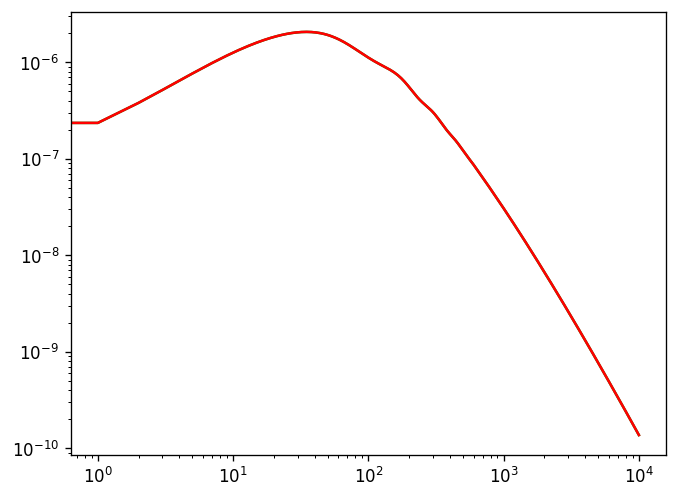

In [13]:
nc_cl = np.array (vp.dup_array ())

fig = plt.figure (dpi = 120)

ells = np.array(ells).astype(int)

import matplotlib.pyplot as plt
plt.plot (ells, cl_g1_histo_bessel, 'g')
plt.plot (ells, nc_cl[ells], 'r')
#
plt.xscale ('log')
plt.yscale ('log')
plt.show()

In [9]:
g1_analytic_bessel, ells, cl_g1_analytic_bessel, vp = ccl_correlation('g1',ells,'bessel')

CLs 6.90506540543973e-310  6.90506540543973e-310  3.09736393620158e-316  3.09736393620158e-316                      0   4.96506830649455e-20   4.96556481332519e-16   5.46162478782705e-15   5.51123078527713e-14   5.51619138502158e-13   1.04812596915143e-12    4.8308519378633e-12   1.07991510052105e-11   2.34020137636207e-11   4.80491606085188e-11   9.38292310336549e-11   3.16110835504496e-10   5.38392439953098e-10   9.66591436669516e-10   1.65554568112317e-09   2.34449992536317e-09   3.69547351834589e-09   5.83342963476965e-09   1.39516608199214e-08    2.2069891975409e-08   1.03252201898754e-07   1.84434508855679e-07   2.65616812846184e-07   3.46799113870268e-07   4.27981411927932e-07   5.09163707019176e-07   6.34851961736689e-07   7.60540209343711e-07   9.80590624409642e-07   1.20064101768068e-06   1.42069138915682e-06   1.77491976489583e-06   2.12914808415707e-06   2.80189355512505e-06   3.47463882238269e-06   4.14738388592988e-06   5.71053983845482e-06   7.27369469116908e-06   8.8368

    0.0344980406854754     0.0345565805096502     0.0346151187082515     0.0346736552812281     0.0347321902285283     0.0347907235501008     0.0348492552458941     0.0349077853158569     0.0349663137599377     0.0350248405780852     0.0350833657702481     0.0351418893363751     0.0352004112764147     0.0352589315903158     0.0353174502780271     0.0353759673394972      0.035434482774675     0.0354929965835093     0.0355515087659487     0.0356100193219422     0.0356685282514385     0.0357270355543865     0.0357855412307351     0.0358440452804331     0.0359025477034295     0.0359610484996731     0.0360195476691129     0.0360780452116978     0.0361365411273768     0.0361950354160988     0.0362535280778129     0.0363120191124681     0.0363705085200134     0.0364289963003979     0.0364874824535705     0.0365459669794805      0.036604449878077     0.0366629311493089     0.0367214107931255     0.0367798888094759     0.0368383651983093     0.0368968399595749     0.0369553130932219     0.03701

     0.0640258623630624      0.064083570139909      0.064141276267238     0.0641989807450066      0.064256683573172     0.0643143847516914     0.0643720842805221     0.0644297821596213     0.0644874783889463     0.0645451729684544     0.0646028658981029     0.0646605571778491     0.0647182468076504     0.0647759347874642     0.0648336211172477     0.0648913057969584     0.0649489888265538     0.0650066702059912      0.065064349935228     0.0651220280142218     0.0651797044429301     0.0652373792213102     0.0652950523493198     0.0653527238269163     0.0654103936540574     0.0654680618307005     0.0655257283568033     0.0655833932323232     0.0656410564572181     0.0656987180314454     0.0657563779549629     0.0658140362277282     0.0658716928496989     0.0659293478208328     0.0659870011410876     0.0660446528104211     0.0661023028287909     0.0661599511961548     0.0662175979124706     0.0662752429776962     0.0663328863917893     0.0663905281547077     0.0664481682664094     0.0665

      0.112478924295486      0.112563364479032      0.112647800882528      0.112732233505877      0.112816662348982      0.112901087411747      0.112985508694074      0.113069926195867       0.11315433991703      0.113238749857465      0.113323156017077      0.113407558395769      0.113491956993445      0.113576351810008      0.113660742845363      0.113745130099413      0.113829513572063      0.113913893263217      0.113998269172778      0.114082641300652      0.114167009646742      0.114251374210953       0.11433573499319      0.114420091993357      0.114504445211359      0.114588794647101      0.114673140300488      0.114757482171423      0.114841820259814      0.114926154565564      0.115010485088579      0.115094811828764      0.115179134786025      0.115263453960266      0.115347769351395      0.115432080959315      0.115516388783933      0.115600692825154      0.115684993082885      0.115769289557031      0.115853582247499      0.115937871154194      0.116022156277022      0.116

      0.156452885845274      0.156535322448649      0.156617755231945      0.156700184195104      0.156782609338072      0.156865030660794      0.156947448163214      0.157029861845278      0.157112271706931      0.157194677748118      0.157277079968784      0.157359478368875      0.157441872948336      0.157524263707111      0.157606650645148      0.157689033762392      0.157771413058787      0.157853788534281      0.157936160188819      0.158018528022347       0.15810089203481      0.158183252226155      0.158265608596329      0.158347961145277      0.158430309872945      0.158512654779281       0.15859499586423       0.15867733312774      0.158759666569756      0.158841996190225      0.158924321989095      0.159006643966311      0.159088962121822      0.159171276455573      0.159253586967513      0.159335893657588      0.159418196525745      0.159500495571932      0.159582790796096      0.159665082198184      0.159747369778145      0.159829653535925      0.159911933471473      0.159

     0.196710473577447       0.19679101782859      0.196871558241429      0.196952094815945       0.19703262755212      0.197113156449933      0.197193681509368      0.197274202730404      0.197354720113024      0.197435233657209      0.197515743362941      0.197596249230202      0.197676751258972      0.197757249449234      0.197837743800971      0.197918234314163      0.197998720988792      0.198079203824842      0.198159682822294       0.19824015798113      0.198320629301332      0.198401096782884      0.198481560425767      0.198562020229964      0.198642476195458       0.19872292832223      0.198803376610265      0.198883821059545      0.198964261670052      0.199044698441769       0.19912513137468      0.199205560468768      0.199285985724016      0.199366407140406      0.199446824717923       0.19952723845655       0.19960764835627      0.199688054417066      0.199768456638923      0.199848855021823      0.199929249565751       0.20000964027069      0.200090027136624      0.2001

      0.234772855033591      0.234851563673589      0.234930268474086      0.235008969435094      0.235087666556626      0.235166359838698      0.235245049281322      0.235323734884511      0.235402416648281      0.235481094572644      0.235559768657614      0.235638438903206      0.235717105309434      0.235795767876311      0.235874426603851       0.23595308149207      0.236031732540981      0.236110379750599      0.236189023120938      0.236267662652012      0.236346298343837      0.236424930196426      0.236503558209795      0.236582182383958       0.23666080271893      0.236739419214725       0.23681803187136      0.236896640688848      0.236975245667205      0.237053846806446      0.237132444106587      0.237211037567641      0.237289627189626      0.237368212972556      0.237446794916446      0.237525373021312       0.23760394728717      0.237682517714036      0.237761084301924      0.237839647050852      0.237918205960834      0.237996761031886      0.238075312264025      0.238

      0.264328577131351      0.264405832133742      0.264483083306233      0.264560330648862      0.264637574161666      0.264714813844683      0.264792049697948      0.264869281721499      0.264946509915375      0.265023734279611      0.265100954814245      0.265178171519315      0.265255384394858      0.265332593440912      0.265409798657514      0.265487000044703      0.265564197602515      0.265641391330988      0.265718581230161      0.265795767300071      0.265872949540757      0.265950127952255      0.266027302534605      0.266104473287845      0.266181640212012      0.266258803307145      0.266335962573282      0.266413118010462      0.266490269618723      0.266567417398103      0.266644561348642      0.266721701470377      0.266798837763348      0.266875970227593      0.266953098863151      0.267030223670061      0.267107344648361      0.267184461798091       0.26726157511929      0.267338684611996      0.267415790276249      0.267492892112089      0.267569990119554      0.267

      0.298631528307138      0.298707068268977      0.298782604423279      0.298858136770106       0.29893366530952      0.299009190041583      0.299084710966358      0.299160228083908      0.299235741394294       0.29931125089758      0.299386756593828      0.299462258483101      0.299537756565461      0.299613250840971      0.299688741309695      0.299764227971694      0.299839710827032      0.299915189875772      0.299990665117977       0.30006613655371      0.300141604183034      0.300217068006012      0.300292528022708      0.300367984233185      0.300443436637506      0.300518885235734      0.300594330027934      0.300669771014169      0.300745208194501      0.300820641568995      0.300896071137715      0.300971496900724      0.301046918858086      0.301122337009865      0.301235465406394      0.301348585239464       0.30146169650929      0.301574799216088      0.301687893360077      0.301800978941471       0.30191405596049      0.302027124417349      0.302140184312268      0.302

     0.339534898302754      0.339645095357079      0.339755283937349      0.339865464043867      0.339975635676934      0.340085798836853      0.340195953523926      0.340306099738457      0.340416237480747      0.340526366751101      0.340636487549822      0.340746599877213      0.340856703733578      0.340966799119222      0.341076886034449      0.341186964479563       0.34129703445487      0.341407095960673       0.34151714899728      0.341627193564995      0.341737229664123      0.341847257294972      0.341957276457846      0.342067287153053        0.3421772893809      0.342287283141692      0.342397268435738      0.342507245263344      0.342617213624819      0.342727173520469      0.342837124950603       0.34294706791553      0.343057002415558      0.343166928450995       0.34327684602215      0.343386755129333      0.343496655772853       0.34360654795302      0.343716431670143      0.343826306924533        0.3439361737165      0.344046032046354      0.344155881914407      0.3442

     0.386994749987159      0.387101267352171      0.387207776396034       0.38731427711914      0.387420769521884      0.387527253604659      0.387633729367858      0.387740196811877      0.387846655937109      0.387953106743949      0.388059549232791       0.38816598340403      0.388272409258062      0.388378826795282      0.388485236016084      0.388591636920865       0.38869802951002      0.388804413783946      0.388910789743037      0.389017157387692      0.389123516718306      0.389229867735276      0.389336210438999      0.389442544829873      0.389548870908293      0.389655188674658      0.389761498129365      0.389867799272813      0.389974092105398       0.39008037662752      0.390186652839577      0.390292920741967      0.390399180335089      0.390505431619342      0.390611674595125      0.390717909262838      0.390824135622879      0.390930353675649      0.391036563421547      0.391142764860974      0.391248957994329      0.391355142822013      0.391461319344427      0.3915

      0.438404404220268      0.438506878552922      0.438609344778685      0.438711802898031      0.438814252911435      0.438916694819371      0.439019128622313      0.439121554320736      0.439223971915115      0.439326381405925       0.43942878279364      0.439531176078736      0.439633561261688      0.439735938342972      0.439838307323063      0.439940668202437       0.44004302098157      0.440145365660938      0.440247702241016      0.440350030722282      0.440452351105212      0.440554663390282      0.440656967577969      0.440759263668749      0.440861551663101      0.440963831561501      0.441066103364426      0.441168367072354      0.441270622685762      0.441372870205128       0.44147510963093      0.441577340963646      0.441679564203753      0.441781779351731      0.441883986408057      0.441986185373211       0.44208837624767      0.442190559031914      0.442292733726421      0.442394900331671      0.442497058848142      0.442599209276315      0.442701351616669      0.442

     0.509925318121179      0.510070506016198      0.510215676503844      0.510360829585989      0.510505965264506      0.510651083541269      0.510796184418152      0.510941267897028      0.511086333979773      0.511231382668261      0.511376413964368      0.511521427869971      0.511666424386944      0.511811403517166      0.511956365262514      0.512101309624864      0.512246236606096      0.512391146208087      0.512536038432717      0.512680913281865      0.512825770757411      0.512970610861234      0.513115433595216      0.513260238961238       0.51340502696118      0.513549797596925      0.513694550870355      0.513839286783353      0.513984005337802      0.514128706535585      0.514273390378586       0.51441805686869      0.514562706007781      0.514707337797745      0.514851952240466      0.514996549337832      0.515141129091729      0.515285691504042      0.515430236576661      0.515574764311471      0.515719274710362      0.515863767775221      0.516008243507938      0.5161

     0.576415253608137        0.5765524562718      0.576689642448742      0.576826812140982       0.57696396535054      0.577101102079437      0.577238222329693      0.577375326103327      0.577512413402361      0.577649484228816      0.577786538584712       0.57792357647207      0.578060597892913      0.578197602849261      0.578334591343137      0.578471563376563       0.57860851895156      0.578745458070151      0.578882380734359      0.579019286946207      0.579156176707718      0.579293050020914       0.57942990688782      0.579566747310459      0.579703571290854       0.57984037883103      0.579977169933011      0.580113944598822      0.580250702830486       0.58038744463003      0.580524169999477      0.580660878940852      0.580797571456183      0.580934247547493      0.581070907216809      0.581207550466156      0.581344177297561       0.58148078771305       0.58161738171465      0.581753959304388      0.581890520484289      0.582027065256382      0.582163593622693      0.5823

      0.640357177865224      0.640551519339374      0.640745825918926       0.64094009761089      0.641134334422274       0.64132853636009      0.641522703431347      0.641716835643056      0.641910933002227      0.642104995515871      0.642299023190998      0.642493016034621      0.642686974053749      0.642880897255395      0.643074785646569      0.643268639234284      0.643462458025551      0.643656242027383       0.64384999124679      0.644043705690786      0.644237385366383      0.644431030280594       0.64462464044043      0.644818215852905      0.645011756525033      0.645205262463824      0.645398733676295      0.645592170169456      0.645785571950322      0.645978939025907      0.646172271403224      0.646365569089287       0.64655883209111      0.646752060415707      0.646945254070092      0.647236224610789      0.647527116511421       0.64781792979597      0.648108664488416      0.648399320612741      0.648689898192929       0.64898039725296      0.649270817816819      0.649

     0.778155895118452      0.778398299150161      0.778640642794106      0.778882926069617      0.779125148996019      0.779367311592635      0.779609413878782      0.779851455873776      0.780093437596928      0.780335359067542      0.780577220304923      0.780819021328369      0.781060762157175      0.781302442810632      0.781544063308027      0.781785623668642      0.782027123911758      0.782268564056648      0.782509944122585      0.782751264128835      0.782992524094662      0.783233724039326       0.78347486398208      0.783715943942178      0.783956963938865      0.784197923991387      0.784438824118981      0.784679664340884      0.784920444676326      0.785161165144535      0.785401825764736      0.785642426556146      0.785882967537981      0.786123448729454       0.78636387014977      0.786604231818133      0.786844533753743      0.787084775975794      0.787324958503479      0.787565081355983      0.787805144552491       0.78804514811218      0.788285092054226        0.78

     0.864879804501628      0.865021076546446      0.865162326768033      0.865303555170986      0.865444761759901      0.865585946539372      0.865727109513993      0.865868250688359       0.86600937006706      0.866150467654688      0.866291543455835      0.866432597475089       0.86657362971704      0.866714640186276      0.866855628887384      0.866996595824951      0.867137541003562      0.867278464427802      0.867419366102254      0.867560246031503      0.867701104220129      0.867841940672715      0.867982755393841      0.868123548388087      0.868264319660031      0.868405069214252      0.868545797055327      0.868686503187831      0.868827187616341      0.868967850345431      0.869108491379675      0.869249110723646      0.869389708381916      0.869530284359057      0.869670838659638      0.869811371288229      0.869951882249399      0.870092371547716      0.870232839187747      0.870373285174058      0.870513709511215      0.870654112203781      0.870794493256321      0.8709

     0.925655628671017      0.925787631009268      0.925919613485003      0.926051576102434      0.926183518865774      0.926315441779232      0.926447344847017      0.926579228073338      0.926711091462404       0.92684293501842      0.926974758745592      0.927106562648127      0.927238346730227      0.927370110996096      0.927501855449936       0.92763358009595      0.927765284938337      0.927896969981298      0.928028635229031      0.928160280685735      0.928291906355606      0.928423512242841      0.928555098351636      0.928686664686184       0.92881821125068      0.928949738049316      0.929081245086284      0.929212732365775      0.929344199891979      0.929475647669086      0.929607075701284       0.92973848399276      0.929869872547701      0.930001241370293      0.930132590464721      0.930263919835168      0.930395229485818      0.930526519420853      0.930657789644454      0.930789040160802      0.930920270974077      0.931051482088457       0.93118267350812      0.9313

     0.995857681228798      0.995979300274038      0.996100901656446      0.996222485379753      0.996344051447688      0.996465599863982       0.99658713063236      0.996708643756552      0.996830139240284       0.99695161708728      0.997073077301265      0.997194519885964      0.997315944845099      0.997437352182392      0.997558741901565      0.997680114006338       0.99780146850043      0.997922805387561      0.998044124671448      0.998165426355808      0.998286710444357      0.998407976940811      0.998529225848884      0.998650457172289       0.99877167091474      0.998892867079949      0.999014045671625      0.999135206693481      0.999256350149224      0.999377476042564      0.999498584377208      0.999619675156863      0.999740748385236       0.99986180406603       0.99998284220295        1.0001038627997       1.00022486585998        1.0003458513875       1.00046681938595       1.00058776985904       1.00070870281046       1.00082961824391        1.0009505161631       1.001

       1.04782968754739        1.0479438673065       1.04805803096691       1.04817217853199        1.0482863100051       1.04840042538962       1.04851452468891       1.04862860790632       1.04874267504522       1.04885672610897       1.04897076110093       1.04908478002446       1.04919878288293       1.04931276967968       1.04942674041807       1.04954069510147       1.04965463373322       1.04976855631668       1.04988246285521       1.04999635335216       1.05011022781087       1.05022408623471       1.05033792862703       1.05045175499116       1.05056556533047        1.0506793596483         1.050793137948       1.05090690023291       1.05102064650639       1.05113437677177        1.0512480910324       1.05136178929163       1.05147547155279       1.05158913781923        1.0517027880943       1.05181642238132       1.05193004068365       1.05204364300461       1.05215722934756       1.05227079971582       1.05238435411272       1.05249789254162       1.05261141500584       1.05

In [10]:
g1_histo_bessel, _, _, _ = ccl_correlation('g1',ells,'bessel')

CLs  8.26913655956521e-08   2.35726135253057e-07   3.80187896558744e-07   5.16676996461515e-07   6.45211456357992e-07   7.65874128177796e-07   8.78855973269197e-07   9.84427909569067e-07   1.08290915652095e-06   1.17464290743222e-06   1.25997950464828e-06   1.33926540987563e-06    1.4128362909519e-06   1.48101293103958e-06   1.54409903648184e-06   1.60238030423632e-06   1.65612431298748e-06   1.70558094266971e-06    1.7509831231652e-06   1.79254777813944e-06   1.83047687414126e-06   1.86495851498301e-06    1.8961680416288e-06   1.92426911146949e-06   1.94941474006056e-06   1.97174829457549e-06   1.99140443235535e-06   2.00850998068253e-06   2.02318475572796e-06   2.03554231983069e-06   2.04569067708162e-06   2.05373290774558e-06   2.05976774246764e-06   2.06389007753577e-06   2.06619143275429e-06    2.0667603537466e-06   2.06568276076277e-06   2.06304224632426e-06   2.05892032429064e-06   2.05339663317925e-06   2.04654909679878e-06    2.0384540454666e-06   2.02918630125678e-06   2.0188

   1.02563183324106e-07   1.02225940970751e-07   1.01890770809645e-07   1.01557615943987e-07   1.01226419908583e-07   1.00897126753912e-07   1.00569681127737e-07   1.00244028354136e-07   9.99201145098575e-08   9.95978864978536e-08   9.92772921179274e-08   9.89582801343723e-08   9.86408003405317e-08   9.83248036201976e-08   9.80102420057774e-08   9.76970687331682e-08   9.73852382932867e-08   9.70747064802037e-08   9.67654304358525e-08   9.64573686912765e-08   9.61504812043948e-08   9.58447293942736e-08   9.55400761718953e-08   9.52364859674249e-08   9.49339247539847e-08   9.46323600679501e-08   9.43317610257892e-08   9.40320983374773e-08   9.37333443165186e-08   9.34354728866202e-08   9.31384595850652e-08   9.28422815628394e-08   9.25469175815718e-08    9.2252348007355e-08   9.19585548015152e-08   9.16655215084099e-08   9.13732332403299e-08   9.10816766595968e-08   9.07908399579397e-08   9.05007128332489e-08   9.02112864638013e-08   8.99225534800593e-08   8.96345079341471e-08   8.934714

  2.36064057261414e-08   2.35618248890632e-08   2.35173632325765e-08    2.3473020345902e-08   2.34287958189107e-08   2.33846892421376e-08   2.33407002067965e-08   2.32968283047969e-08   2.32530731287625e-08   2.32094342720503e-08   2.31659113287723e-08   2.31225038938167e-08   2.30792115628727e-08   2.30360339324539e-08    2.2992970599925e-08   2.29500211635276e-08   2.29071852224086e-08   2.28644623766482e-08   2.28218522272895e-08    2.2779354376368e-08   2.27369684269425e-08   2.26946939831265e-08   2.26525306501189e-08   2.26104780342369e-08   2.25685357429478e-08   2.25267033849016e-08   2.24849805699637e-08   2.24433669092477e-08    2.2401862015148e-08   2.23604655013727e-08   2.23191769829759e-08   2.22779960763904e-08   2.22369223994593e-08   2.21959555714679e-08   2.21550952131752e-08   2.21143409468442e-08   2.20736923962724e-08   2.20331491868213e-08   2.19927109454454e-08   2.19523773007206e-08   2.19121478828709e-08   2.18720223237956e-08   2.18320002570949e-08   2.1792081

     7.871689710943e-09   7.86215554860991e-09   7.85263754845563e-09   7.84313567505569e-09   7.83364989308249e-09   7.82418016730538e-09   7.81472646259037e-09   7.80528874390008e-09   7.79586697629357e-09   7.78646112492626e-09   7.77707115504974e-09    7.7676970320116e-09   7.75833872125535e-09   7.74899618832018e-09   7.73966939884083e-09   7.73035831854739e-09   7.72106291326515e-09   7.71178314891437e-09   7.70251899151009e-09   7.69327040716192e-09   7.68403736207389e-09   7.67481982254406e-09   7.66561775496448e-09   7.65643112582085e-09    7.6472599016922e-09   7.63810404925084e-09   7.62896353526185e-09   7.61983832658301e-09   7.61072839016435e-09   7.60163369304802e-09   7.59255420236782e-09   7.58348988534905e-09   7.57444070930807e-09   7.56540664165207e-09   7.55638764987862e-09   7.54738370157549e-09   7.53839476442017e-09   7.52942080617954e-09   7.52046179470959e-09   7.51151769795492e-09   7.50258848394848e-09   7.49367412081109e-09   7.48477457675115e-09   7.475889

   4.81969786932034e-09    4.8148958731689e-09    4.8101005553339e-09   4.80531190386441e-09   4.80052990683653e-09   4.79575455235333e-09   4.79098582854469e-09   4.78622372356726e-09    4.7814682256043e-09   4.77671932286563e-09   4.77197700358752e-09   4.76724125603254e-09   4.76251206848951e-09   4.75778942927337e-09    4.7530733267251e-09   4.74836374921158e-09   4.74366068512551e-09   4.73896412288528e-09   4.73427405093493e-09   4.72959045774397e-09   4.72491333180728e-09   4.72024266164508e-09   4.71557843580278e-09   4.71092064285082e-09   4.70626927138468e-09    4.7016243100247e-09   4.69698574741601e-09   4.69235357222842e-09   4.68772777315633e-09   4.68310833891861e-09   4.67849525825853e-09   4.67388851994365e-09   4.66928811276573e-09   4.66469402554064e-09   4.66010624710828e-09   4.65552476633242e-09   4.65094957210072e-09   4.64638065332455e-09   4.64181799893897e-09    4.6372615979026e-09   4.63271143919754e-09   4.62816751182933e-09   4.62362980482681e-09    4.61909

   3.3424717153105e-09   3.33958967540659e-09   3.33671109813523e-09   3.33383597814612e-09   3.33096431009887e-09    3.3280960886629e-09   3.32523130851749e-09   3.32236996435174e-09   3.31951205086453e-09   3.31665756276455e-09   3.31380649477025e-09   3.31095884160984e-09   3.30811459802125e-09   3.30527375875214e-09   3.30243631855989e-09   3.29960227221158e-09   3.29677161448393e-09   3.29394434016338e-09     3.291120444046e-09   3.28829992093749e-09   3.28548276565321e-09   3.28266897301812e-09   3.27985853786678e-09   3.27705145504337e-09   3.27424771940163e-09   3.27144732580489e-09   3.26865026912603e-09   3.26585654424748e-09   3.26306614606124e-09    3.2602790694688e-09   3.25749530938119e-09   3.25471486071897e-09   3.25193771841216e-09   3.24916387740031e-09   3.24639333263243e-09   3.24362607906701e-09   3.24086211167198e-09   3.23810142542476e-09   3.23534401531217e-09   3.23258987633049e-09    3.2298390034854e-09   3.22709139179202e-09   3.22434703627482e-09   3.2216059

  2.17107982894358e-09   2.16949919192611e-09    2.1679201549948e-09   2.16634271606849e-09   2.16476687306935e-09   2.16319262392282e-09   2.16161996655766e-09   2.16004889890594e-09   2.15847941890298e-09   2.15691152448745e-09   2.15534521360124e-09   2.15378048418958e-09   2.15221733420094e-09   2.15065576158707e-09     2.149095764303e-09   2.14753734030702e-09   2.14598048756067e-09   2.14442520402877e-09   2.14287148767937e-09   2.14131933648376e-09   2.13976874841652e-09   2.13821972145543e-09    2.1366722535815e-09     2.135126342779e-09   2.13358198703541e-09   2.13203918434142e-09   2.13049793269096e-09   2.12895823008117e-09   2.12742007451237e-09   2.12588346398811e-09   2.12434839651514e-09   2.12281487010337e-09   2.12128288276594e-09   2.11975243251913e-09   2.11822351738245e-09   2.11669613537852e-09   2.11517028453319e-09   2.11364596287541e-09   2.11212316843735e-09   2.11060189925428e-09   2.10908215336463e-09   2.10756392880999e-09   2.10604722363506e-09   2.1045320

  1.48969516510787e-09   1.48875857686824e-09   1.48782280601219e-09   1.48688785162358e-09   1.48595371278751e-09   1.48502038859033e-09   1.48408787811962e-09    1.4831561804642e-09   1.48222529471414e-09   1.48129521996077e-09   1.48036595529665e-09   1.47943749981558e-09   1.47850985261261e-09   1.47758301278404e-09    1.4766569794274e-09   1.47573175164148e-09   1.47480732852631e-09   1.47388370918317e-09   1.47296089271457e-09   1.47203887822428e-09   1.47111766481731e-09    1.4701972515999e-09   1.46927763767957e-09   1.46835882216505e-09   1.46744080416632e-09   1.46652358279462e-09   1.46560715716241e-09   1.46469152638342e-09   1.46377668957259e-09   1.46286264584612e-09   1.46194939432145e-09   1.46103693411726e-09   1.46012526435346e-09    1.4592143841512e-09   1.45830429263287e-09    1.4573949889221e-09   1.45648647214375e-09    1.4555787414239e-09   1.45467179588989e-09   1.45376563467026e-09    1.4528602568948e-09   1.45195566169453e-09   1.45105184820167e-09   1.4501488

  1.07079999727987e-09   1.07020758099271e-09   1.06961561903389e-09   1.06902411095688e-09   1.06843305631565e-09   1.06784245466472e-09   1.06725230555914e-09   1.06666260855447e-09   1.06607336320681e-09   1.06548456907277e-09   1.06489622570948e-09   1.06430833267462e-09   1.06372088952638e-09   1.06313389582344e-09   1.06254735112505e-09   1.06196125499096e-09   1.06137560698142e-09   1.06079040665724e-09    1.0602056535797e-09   1.05962134731065e-09   1.05903748741242e-09   1.05845407344786e-09   1.05787110498035e-09   1.05728858157379e-09   1.05670650279257e-09   1.05612486820162e-09   1.05554367736637e-09   1.05496292985277e-09   1.05438262522729e-09    1.0538027630569e-09   1.05322334290908e-09   1.05264436435184e-09   1.05206582695368e-09   1.05148773028364e-09   1.05091007391124e-09   1.05033285740654e-09   1.04975608034008e-09   1.04917974228293e-09   1.04860384280667e-09   1.04802838148339e-09   1.04745335788568e-09   1.04687877158663e-09   1.04630462215987e-09   1.0457309

    8.0101222387698e-10   8.00615985658035e-10   8.00220018828899e-10   7.99824323151634e-10   7.99428898388547e-10   7.99033744302202e-10   7.98638860655412e-10    7.9824424721124e-10   7.97849903732994e-10   7.97455829984243e-10   7.97062025728792e-10   7.96668490730702e-10   7.96275224754279e-10   7.95882227564081e-10   7.95489498924906e-10   7.95097038601806e-10   7.94704846360075e-10   7.94312921965257e-10    7.9392126518314e-10   7.93529875779756e-10   7.93138753521389e-10   7.92747898174562e-10   7.92357309506044e-10   7.91966987282853e-10   7.91576931272246e-10   7.91187141241731e-10   7.90797616959053e-10   7.90408358192208e-10   7.90019364709432e-10   7.89630636279206e-10   7.89242172670256e-10   7.88853973651549e-10   7.88466038992299e-10    7.8807836846196e-10   7.87690961830233e-10   7.87303818867059e-10   7.86916939342621e-10   7.86530323027352e-10   7.86143969691924e-10   7.85757879107247e-10   7.85372051044483e-10   7.84986485275029e-10   7.84601181570532e-10   7.842161

  6.41056404112232e-10   6.40765297523727e-10   6.40474373815221e-10   6.40183632839863e-10   6.39893074450941e-10   6.39602698501882e-10   6.39312504846253e-10   6.39022493337763e-10   6.38732663830257e-10    6.3844301617772e-10   6.38153550234274e-10   6.37864265854178e-10   6.37575162891829e-10   6.37286241201758e-10   6.36997500638633e-10   6.36708941057257e-10   6.36420562312565e-10   6.36132364259632e-10   6.35844346753659e-10   6.35556509649988e-10   6.35268852804087e-10   6.34981376071559e-10   6.34694079308143e-10   6.34406962369704e-10   6.34120025112241e-10   6.33833267391882e-10   6.33546689064889e-10   6.33260289987652e-10   6.32974070016693e-10   6.32688029008664e-10   6.32402166820345e-10   6.32116483308646e-10   6.31830978330609e-10   6.31545651743404e-10   6.31260503404329e-10   6.30975533170814e-10   6.30690740900418e-10   6.30406126450827e-10   6.30121689679857e-10   6.29837430445457e-10     6.295533486057e-10   6.29269444018793e-10    6.2898571654307e-10   6.2870216

  5.19939430843942e-10   5.19721521507068e-10   5.19503738416746e-10   5.19286081479221e-10   5.19068550600829e-10   5.18851145687996e-10   5.18633866647234e-10    5.1841671338515e-10   5.18199685808439e-10   5.17982783823888e-10   5.17766007338375e-10    5.1754935625887e-10   5.17332830492435e-10   5.17116429946224e-10   5.16900154527485e-10   5.16684004143555e-10   5.16467978701868e-10   5.16252078109949e-10   5.16036302275415e-10   5.15820651105981e-10   5.15605124509448e-10   5.15389722393717e-10    5.1517444466678e-10   5.14959291236721e-10   5.14744262011719e-10   5.14529356900046e-10   5.14314575810068e-10   5.14099918650245e-10   5.13885385329125e-10   5.13670975755353e-10   5.13456689837668e-10   5.13242527484896e-10   5.13028488605962e-10   5.12814573109876e-10   5.12600780905745e-10   5.12387111902763e-10   5.12173566010218e-10   5.11960143137486e-10   5.11746843194035e-10    5.1153366608942e-10    5.1132061173329e-10   5.11107680035378e-10   5.10894870905508e-10   5.1068218

   4.48449361443158e-10   4.48271742495915e-10   4.48094220751532e-10   4.47916796142037e-10   4.47739468599506e-10    4.4756223805607e-10   4.47385104443907e-10   4.47208067695251e-10   4.47031127742383e-10   4.46854284517639e-10   4.46677537953402e-10   4.46500887982111e-10   4.46324334536252e-10   4.46147877548365e-10   4.45971516951038e-10   4.45795252676913e-10   4.45619084658684e-10   4.45443012829091e-10   4.45267037120931e-10   4.45091157467051e-10   4.44915373800347e-10    4.4473968605377e-10   4.44564094160321e-10   4.44388598053054e-10   4.44213197665075e-10    4.4403789292954e-10   4.43862683779661e-10     4.436875701487e-10   4.43512551969973e-10    4.4333762917685e-10   4.43162801702752e-10   4.42988069481154e-10   4.42813432445587e-10   4.42638890529633e-10   4.42464443666929e-10   4.42290091791167e-10   4.42115834836094e-10   4.41941672735511e-10   4.41767605423272e-10    4.4159363283329e-10   4.41419754899532e-10   4.41245971556021e-10   4.41072282736835e-10    4.40898

  3.52556234005092e-10   3.52428832428741e-10   3.52301494409126e-10   3.52174219905677e-10   3.52047008877857e-10   3.51919861285167e-10   3.51792777087139e-10   3.51665756243343e-10   3.51538798713378e-10   3.51411904456886e-10   3.51285073433534e-10   3.51158305603032e-10    3.5103160092512e-10   3.50904959359575e-10   3.50778380866209e-10   3.50651865404867e-10   3.50525412935431e-10   3.50399023417817e-10   3.50272696811976e-10   3.50146433077894e-10   3.50020232175592e-10   3.49894094065127e-10   3.49768018706587e-10     3.496420060601e-10   3.49516056085825e-10   3.49390168743956e-10   3.49264343994723e-10    3.4913858179839e-10   3.49012882115254e-10   3.48887244905647e-10   3.48761670129937e-10   3.48636157748521e-10   3.48510707721835e-10   3.48385320010346e-10   3.48259994574555e-10   3.48134731374996e-10   3.48009530372237e-10   3.47884391526877e-10    3.4775931479955e-10   3.47634300150921e-10   3.47509347541687e-10   3.47384456932579e-10   3.47259628284359e-10   3.4713486

  2.88446853806916e-10   2.88350276603746e-10   2.88253744011848e-10   2.88157256004873e-10   2.88060812556495e-10   2.87964413640407e-10   2.87868059230324e-10   2.87771749299977e-10   2.87675483823121e-10    2.8757926277353e-10   2.87483086124998e-10   2.87386953851339e-10   2.87290865926387e-10   2.87194822323997e-10   2.87098823018045e-10   2.87002867982426e-10   2.86906957191053e-10   2.86811090617865e-10   2.86715268236816e-10   2.86619490021883e-10   2.86523755947062e-10   2.86428065986371e-10   2.86332420113844e-10    2.8623681830354e-10   2.86141260529537e-10    2.8604574676593e-10   2.85950276986839e-10     2.858548511664e-10    2.8575946927877e-10   2.85664131298128e-10   2.85568837198673e-10   2.85473586954619e-10   2.85378380540205e-10    2.8528321792969e-10   2.85188099097348e-10   2.85093024017479e-10   2.84997992664397e-10   2.84903005012439e-10   2.84808061035962e-10   2.84713160709338e-10   2.84618304006966e-10   2.84523490903256e-10   2.84428721372644e-10    2.843339

  2.51349819638126e-10   2.51269946218212e-10   2.51190107800903e-10   2.51110304366597e-10   2.51030535895708e-10   2.50950802368661e-10   2.50871103765897e-10   2.50791440067871e-10   2.50711811255051e-10   2.50632217307917e-10   2.50552658206968e-10   2.50473133932713e-10   2.50393644465675e-10   2.50314189786394e-10    2.5023476987542e-10   2.50155384713321e-10   2.50076034280676e-10    2.4999671855808e-10   2.49917437526141e-10    2.4983819116548e-10   2.49758979456736e-10   2.49679802380558e-10   2.49600659917612e-10   2.49521552048574e-10    2.4944247875414e-10   2.49363440015016e-10   2.49284435811923e-10   2.49205466125596e-10   2.49126530936785e-10   2.49047630226253e-10   2.48968763974779e-10   2.48889932163154e-10   2.48811134772183e-10   2.48732371782687e-10   2.48653643175501e-10   2.48574948931471e-10   2.48496289031461e-10   2.48417663456346e-10   2.48339072187017e-10   2.48260515204378e-10   2.48181992489346e-10   2.48103504022855e-10   2.48025049785849e-10   2.4794662

  2.16052992703034e-10   2.15988160726334e-10   2.15923355566414e-10   2.15858577209097e-10   2.15793825640215e-10   2.15729100845605e-10   2.15664402811115e-10   2.15599731522597e-10   2.15535086965912e-10    2.1547046912693e-10   2.15405877991527e-10   2.15341313545588e-10   2.15276775775006e-10    2.1521226466568e-10   2.15147780203519e-10    2.1508332237444e-10   2.15018891164366e-10   2.14954486559231e-10   2.14890108544976e-10   2.14825757107551e-10   2.14761432232912e-10   2.14697133907027e-10   2.14632862115871e-10   2.14568616845426e-10   2.14504398081687e-10   2.14440205810653e-10   2.14376040018337e-10   2.14311900690756e-10    2.1424778781394e-10   2.14183701373926e-10   2.14119641356762e-10   2.14055607748504e-10   2.13991600535219e-10   2.13927619702981e-10   2.13863665237877e-10   2.13799737126001e-10   2.13735835353459e-10   2.13671959906366e-10   2.13608110770845e-10   2.13544287933034e-10   2.13480491379076e-10   2.13416721095127e-10   2.13352977067353e-10   2.1328925

  1.88150229892939e-10   1.88096647682085e-10   1.88043086495813e-10     1.879895463236e-10   1.87936027154934e-10    1.8788252897931e-10   1.87829051786228e-10   1.87775595565199e-10   1.87722160305737e-10   1.87668745997365e-10   1.87615352629615e-10   1.87561980192023e-10   1.87508628674133e-10   1.87455298065498e-10   1.87401988355674e-10   1.87348699534227e-10   1.87295431590729e-10   1.87242184514757e-10   1.87188958295897e-10   1.87135752923741e-10   1.87082568387886e-10   1.87029404677938e-10   1.86976261783507e-10    1.8692313969421e-10   1.86870038399671e-10    1.8681695788952e-10   1.86763898153394e-10   1.86710859180934e-10   1.86657840961788e-10    1.8660484348561e-10   1.86551866742062e-10   1.86498910720809e-10   1.86445975411523e-10   1.86393060803881e-10   1.86340166887569e-10   1.86287293652275e-10   1.86234441087693e-10   1.86181609183525e-10   1.86128797929478e-10   1.86076007315263e-10   1.86023237330598e-10   1.85970487965206e-10   1.85917759208816e-10   1.8586505

   1.65878368837487e-10   1.65833324339258e-10   1.65788296688128e-10   1.65743285876043e-10   1.65698291894955e-10   1.65653314736823e-10    1.6560835439361e-10   1.65563410857284e-10    1.6551848411982e-10   1.65473574173197e-10   1.65428681009399e-10   1.65383804620417e-10   1.65338944998248e-10   1.65294102134892e-10   1.65249276022356e-10   1.65204466652654e-10   1.65159674017802e-10   1.65114898109826e-10   1.65070138920753e-10    1.6502539644262e-10   1.64980670667465e-10   1.64935961587337e-10   1.64891269194286e-10   1.64846593480369e-10    1.6480193443765e-10   1.64757292058197e-10   1.64712666334085e-10   1.64668057257391e-10   1.64623464820204e-10   1.64578889014612e-10   1.64534329832713e-10   1.64489787266607e-10   1.64445261308403e-10   1.64400751950214e-10   1.64356259184157e-10   1.64311783002356e-10    1.6426732339694e-10   1.64222880360044e-10   1.64178453883808e-10   1.64134043960375e-10   1.64089650581897e-10   1.64045273740529e-10   1.64000913428431e-10   1.639565

  1.44591700396948e-10   1.44554418289346e-10     1.445171494171e-10   1.44479893774202e-10   1.44442651354647e-10   1.44405422152435e-10   1.44368206161566e-10   1.44331003376046e-10   1.44293813789881e-10   1.44256637397083e-10   1.44219474191666e-10   1.44182324167647e-10   1.44145187319045e-10   1.44108063639884e-10   1.44070953124192e-10   1.44033855765998e-10   1.43996771559335e-10   1.43959700498241e-10   1.43922642576755e-10   1.43885597788921e-10   1.43848566128786e-10   1.43811547590401e-10    1.4377454216782e-10   1.43737549855101e-10   1.43700570646304e-10   1.43663604535495e-10   1.43626651516742e-10   1.43589711584117e-10   1.43552784731697e-10    1.4351587095356e-10    1.4347897024379e-10   1.43442082596474e-10   1.43405208005703e-10   1.43368346465572e-10   1.43331497970179e-10   1.43294662513626e-10   1.43257840090019e-10   1.43221030693469e-10   1.43184234318088e-10   1.43147450957996e-10   1.43110680607312e-10   1.43073923260163e-10   1.43037178910678e-10    1.430004

In [11]:
g1_analytic_fftlog, _, _, _ = ccl_correlation('g1',ells,'fftlog')

CLs 6.90506540543973e-310  6.90506540543973e-310  3.10773140971391e-316  3.10773140971391e-316   5.51123078527713e-14   5.51619138502158e-13   1.04812596915143e-12    4.8308519378633e-12   1.07991510052105e-11   2.34020137636207e-11   4.80491606085188e-11   9.38292310336549e-11   3.16110835504496e-10   5.38392439953098e-10   9.66591436669516e-10   1.65554568112317e-09   2.34449992536317e-09   3.69547351834589e-09   5.83342963476965e-09   1.39516608199214e-08    2.2069891975409e-08   1.03252201898754e-07   1.84434508855679e-07   2.65616812846184e-07   3.46799113870268e-07   4.27981411927932e-07   5.09163707019176e-07   6.34851961736689e-07   7.60540209343711e-07   9.80590624409642e-07   1.20064101768068e-06   1.42069138915682e-06   1.77491976489583e-06   2.12914808415707e-06   2.80189355512505e-06   3.47463882238269e-06   4.14738388592988e-06   5.71053983845482e-06   7.27369469116908e-06   8.83684844407154e-06   1.54824728453101e-05    2.2128077367734e-05    3.2549689858295e-05   4.2971

     0.0248755545793933     0.0249343602884237     0.0249931643805535     0.0250519668557282     0.0251107677138937     0.0251695669549958     0.0252283645789801     0.0252871605857925     0.0253459549753788     0.0254047477476847     0.0254635389026562     0.0255223284402391     0.0255811163603792     0.0256399026630225     0.0256986873481148     0.0257574704156021     0.0258162518654303     0.0258750316975454     0.0259338099118933       0.02599258650842     0.0260513614870716      0.026110134847794     0.0261689065905334     0.0262276767152357     0.0262864452218471     0.0263452121103136     0.0264039773805814     0.0264627410325966     0.0265215030663053     0.0265802634816536     0.0266390222785879     0.0266977794570542     0.0267565350169989      0.026815288958368     0.0268740412811079     0.0269327919851649     0.0269915410704851      0.027050288537015     0.0271090343847009      0.027167778613489     0.0272265212233257     0.0272852622141574     0.0273440015859306     0.0274

     0.0572047755981931     0.0572626777128054     0.0573205781830703     0.0573784770089431     0.0574363741903788     0.0574942697273329     0.0575521636197605     0.0576100558676168     0.0576679464708572      0.057725835429437     0.0577837227433114     0.0578416084124358     0.0578994924367656      0.057957374816256     0.0580152555508625     0.0580731346405405     0.0581310120852454     0.0581888878849326     0.0582467620395576     0.0583046345490758     0.0583625054134427     0.0584203746326139     0.0584782422065447     0.0585361081351909     0.0585939724185078     0.0586518350564511     0.0587096960489764     0.0587675553960392     0.0588254130975952        0.0588832691536     0.0589411235640093     0.0589989763287787     0.0590568274478639     0.0591146769212207     0.0591725247488046     0.0592303709305716     0.0592882154664772     0.0593460583564774     0.0594038996005278     0.0594617391985844     0.0595195771506028      0.059577413456539     0.0596352481163487      0.059

     0.0862922394168409     0.0863493041293629     0.0864063671770187     0.0864634285597718     0.0865204882775861     0.0865775463304252     0.0866346027182528     0.0866916574410328      0.086748710498729      0.086805761891305     0.0868628116187247     0.0869198596809519     0.0869769060779505     0.0870339508096843     0.0870909938761172     0.0871480352772131     0.0872050750129358     0.0872621130832494     0.0873191494881176     0.0873761842275046     0.0874332173013743     0.0874902487096906     0.0875472784524175     0.0876043065295191     0.0876613329409595     0.0877183576867026     0.0877753807667125     0.0878324021809533     0.0878894219293892     0.0879464400119842     0.0880034564287026     0.0880604711795083     0.0881174842643657     0.0881744956832388     0.0882315054360919     0.0882885135228893     0.0883455199435951     0.0884025246981736      0.088459527786589     0.0885165292088058     0.0885735289647881     0.0886305270545002     0.0886875234779066     0.0887

     0.118717281768855      0.118801441971986      0.118885598388109      0.118969751017133      0.119053899858966      0.119138044913518      0.119222186180699      0.119306323660418      0.119390457352583      0.119474587257105      0.119558713373893      0.119642835702857      0.119726954243906      0.119811068996951      0.119895179961901      0.119979287138666      0.120063390527156      0.120147490127282      0.120231585938953      0.120315677962081      0.120399766196575      0.120483850642345      0.120567931299303      0.120652008167359      0.120736081246424      0.120820150536408      0.120904216037223      0.120988277748779      0.121072335670987      0.121156389803759      0.121240440147005      0.121324486700638      0.121408529464567      0.121492568438706      0.121576603622965      0.121660635017255      0.121744662621489      0.121828686435578      0.121912706459435      0.121996722692971      0.122080735136097      0.122164743788727      0.122248748650772      0.1223

     0.155050879169489      0.155133380705703      0.155215878422788      0.155298372320687      0.155380862399344      0.155463348658702      0.155545831098705      0.155628309719297      0.155710784520422      0.155793255502023      0.155875722664045      0.155958186006431      0.156040645529125      0.156123101232072      0.156205553115216      0.156288001178501      0.156370445421872      0.156452885845274      0.156535322448649      0.156617755231945      0.156700184195104      0.156782609338072      0.156865030660794      0.156947448163214      0.157029861845278      0.157112271706931      0.157194677748118      0.157277079968784      0.157359478368875      0.157441872948336      0.157524263707111      0.157606650645148      0.157689033762392      0.157771413058787      0.157853788534281      0.157936160188819      0.158018528022347       0.15810089203481      0.158183252226155      0.158265608596329      0.158347961145277      0.158430309872945      0.158512654779281       0.158

      0.19364694804449      0.193727638136489      0.193808324390956      0.193889006807867      0.193969685387201      0.194050360128937      0.194131031033054      0.194211698099529      0.194292361328343      0.194373020719473      0.194453676272899      0.194534327988599      0.194614975866553       0.19469561990674      0.194776260109139      0.194856896473729      0.194937529000489        0.1950181576894       0.19509878254044      0.195179403553589      0.195260020728827      0.195340634066132      0.195421243565486      0.195501849226868      0.195582451050258      0.195663049035636      0.195743643182981      0.195824233492274      0.195904819963495      0.195985402596625      0.196065981391644      0.196146556348531      0.196227127467268      0.196307694747835      0.196388258190213      0.196468817794383      0.196549373560324      0.196629925488019      0.196710473577447       0.19679101782859      0.196871558241429      0.196952094815945       0.19703262755212      0.1971

     0.244268730110191      0.244346974286625      0.244425214625651      0.244503451127289       0.24458168379156      0.244659912618486      0.244738137608088      0.244816358760388      0.244894576075407      0.244972789553167      0.245050999193689      0.245129204996995      0.245207406963106      0.245285605092045      0.245363799383833      0.245441989838493      0.245520176456046      0.245598359236514      0.245676538179919      0.245754713286284      0.245832884555631      0.245911051987982      0.245989215583359      0.246067375341786      0.246145531263283      0.246223683347875      0.246301831595583      0.246379976006431       0.24645811658044      0.246536253317634      0.246614386218036      0.246692515281669      0.246770640508555      0.246848761898717       0.24692687945218      0.247004993168965      0.247083103049096      0.247161209092597      0.247239311299491      0.247317409669801       0.24739550420355      0.247473594900763      0.247551681761463      0.2476

     0.278249381976627      0.278325944426443      0.278402503054003      0.278479057859355      0.278555608842546      0.278632156003624      0.278708699342637      0.278785238859632      0.278861774554657       0.27893830642776      0.279014834478989      0.279091358708391      0.279167879116015      0.279244395701909      0.279320908466121      0.279397417408699      0.279473922529691      0.279550423829145      0.279626921307111      0.279703414963635      0.279779904798768      0.279856390812557       0.27993287300505      0.280009351376297      0.280085825926346      0.280162296655246      0.280238763563045      0.280315226649793      0.280391685915538       0.28046814136033      0.280544592984216      0.280621040787248      0.280697484769472       0.28077392493094      0.280850361271699        0.2809267937918      0.281003222491292      0.281079647370223      0.281156068428644      0.281232485666604      0.281308899084152      0.281385308681339      0.281461714458214      0.2815

     0.315869321336226      0.315981329856612       0.31609332984409      0.316205321298909      0.316317304221321      0.316429278611576      0.316541244469925       0.31665320179662      0.316765150591911      0.316877090856051      0.316989022589292      0.317100945791885      0.317212860464084      0.317324766606141      0.317436664218309      0.317548553300842      0.317660433853992      0.317772305878015      0.317884169373163      0.317996024339691      0.318107870777854      0.318219708687906      0.318331538070103      0.318443358924699      0.318555171251951      0.318666975052113      0.318778770325443      0.318890557072196      0.319002335292629      0.319114104986999      0.319225866155562      0.319337618798577        0.3194493629163      0.319561098508989      0.319672825576903      0.319784544120299      0.319896254139437      0.320007955634575      0.320119648605972      0.320231333053887       0.32034300897858      0.320454676380311      0.320566335259339      0.3206

      0.365198884532694      0.365307098964011       0.36541530499834      0.365523502636034      0.365631691877448      0.365739872722935      0.365848045172849      0.365956209227545      0.366064364887375      0.366172512152696      0.366280651023862      0.366388781501228      0.366496903585148       0.36660501727598      0.366713122574077      0.366821219479796      0.366929307993493      0.367037388115525      0.367145459846247      0.367253523186016      0.367361578135189      0.367469624694124      0.367577662863176      0.367685692642705      0.367793714033067       0.36790172703462      0.368009731647723      0.368117727872734      0.368225715710011      0.368333695159912      0.368441666222798      0.368549628899026      0.368657583188957      0.368765529092949      0.368873466611363      0.368981395744558      0.369089316492894      0.369197228856732      0.369305132836433      0.369413028432356      0.369520915644864      0.369628794474316      0.369736664921075      0.369

      0.41242571860748       0.41253024236918      0.412634757909718      0.412739265229532      0.412843764329056      0.412948255208726       0.41305273786898      0.413157212310252       0.41326167853298      0.413366136537601       0.41347058632455      0.413575027894266      0.413679461247185      0.413783886383744      0.413888303304381      0.413992712009535      0.414097112499641      0.414201504775139      0.414305888836467      0.414410264684063      0.414514632318365      0.414618991739812      0.414723342948843      0.414827685945896      0.414932020731411      0.415036347305828      0.415140665669585      0.415244975823122      0.415349277766879      0.415453571501296      0.415557857026813       0.41566213434387      0.415766403452908      0.415870664354367      0.415974917048687      0.416079161536311      0.416183397817678       0.41628762589323      0.416391845763408      0.416496057428655      0.416600260889411      0.416704456146119       0.41680864319922      0.4169

     0.451759686825978      0.451861103243267       0.45196251161694      0.452063911947487        0.4521653042354      0.452266688481173      0.452368064685297      0.452469432848265      0.452570792970569      0.452672145052701      0.452773489095155      0.452874825098423      0.452976153062999      0.453077472989376      0.453178784878046      0.453280088729503      0.453381384544242      0.453482672322754      0.453583952065536      0.453685223773079      0.453786487445879      0.453887743084429      0.453988990689224      0.454090230260758      0.454191461799526      0.454292685306022      0.454393900780742       0.45449510822418      0.454596307636832      0.454697499019192      0.454798682371756      0.454899857695019      0.455001024989478      0.455102184255627      0.455203335493963      0.455304478704982      0.455405613889179      0.455506741047051      0.455607860179095      0.455708971285806      0.455810074367682      0.455911169425218      0.456012256458913      0.4561

      0.495711109458925      0.495809028082742      0.495906938891329      0.496004841885228      0.496102737064979      0.496200624431125      0.496298503984207      0.496396375724766      0.496494239653346      0.496592095770487      0.496689944076733      0.496787784572624      0.496885617258705      0.496983442135516        0.4970812592036        0.4971790684635       0.49727686991576       0.49737466356092      0.497472449399525      0.497570227432117      0.497667997659239      0.497765760081435      0.497863514699248      0.497961261513221      0.498059000523897       0.49815673173182      0.498254455137534      0.498352170741582      0.498449878544508      0.498547578546857      0.498645270749171      0.498742955151996      0.498840631755875      0.498938300561352      0.499035961568973      0.499133614779281      0.499231260192821      0.499328897810137      0.499426527631775      0.499524149658279      0.499621763890194      0.499719370328066      0.499816968972438      0.499

      0.555227791897379      0.555367540687251      0.555507272684079      0.555646987889847      0.555786686306538      0.555926367936136      0.556066032780624      0.556205680841988      0.556345312122212       0.55648492662328      0.556624524347177       0.55676410529589      0.556903669471403      0.557043216875702      0.557182747510774      0.557322261378604       0.55746175848118      0.557601238820489      0.557740702398517      0.557880149217253      0.558019579278683      0.558158992584796       0.55829838913758      0.558437768939024      0.558577131991117      0.558716478295847      0.558855807855203      0.558995120671176      0.559134416745755       0.55927369608093      0.559412958678692      0.559552204541031      0.559691433669939      0.559830646067405      0.559969841735422      0.560109020675981      0.560248182891074      0.560387328382694      0.560526457152832      0.560665569203481      0.560804664536635      0.560943743154286      0.561082805058428      0.561

       0.63529202857435      0.635487279767795      0.635682495884462      0.635877676931355      0.636072822915478      0.636267933843836      0.636463009723434      0.636658050561276      0.636853056364369      0.637048027139717      0.637242962894327      0.637437863635205      0.637632729369356      0.637827560103788      0.638022355845507      0.638217116601519      0.638411842378832      0.638606533184454      0.638801189025391      0.638995809908652      0.639190395841244      0.639384946830176      0.639579462882455      0.639773944005091      0.639968390205092      0.640162801489467      0.640357177865224      0.640551519339374      0.640745825918926       0.64094009761089      0.641134334422274       0.64132853636009      0.641522703431347      0.641716835643056      0.641910933002227      0.642104995515871      0.642299023190998      0.642493016034621      0.642686974053749      0.642880897255395      0.643074785646569      0.643268639234284      0.643462458025551      0.643

     0.770611312161104       0.77085559782217      0.771099822494341      0.771343986197064      0.771588088949785      0.771832130771944      0.772076111682977      0.772320031702318      0.772563890849395      0.772807689143636       0.77305142660446      0.773295103251286      0.773538719103529      0.773782274180599      0.774025768501902      0.774269202086842      0.774512574954818      0.774755887125224      0.774999138617453      0.775242329450892      0.775485459644925      0.775728529218932      0.775971538192289      0.776214486584369       0.77645737441454      0.776700201702168      0.776942968466612      0.777185674727231      0.777428320503377      0.777670905814399      0.777913430679643      0.778155895118452      0.778398299150161      0.778640642794106      0.778882926069617      0.779125148996019      0.779367311592635      0.779609413878782      0.779851455873776      0.780093437596928      0.780335359067542      0.780577220304923      0.780819021328369      0.7810

     0.900481525221959      0.900617337530246      0.900753129168597      0.900888900141388      0.901024650452996      0.901160380107794      0.901296089110157      0.901431777464457      0.901567445175067      0.901703092246357      0.901838718682699      0.901974324488461      0.902109909668011      0.902245474225719       0.90238101816595       0.90251654149307      0.902652044211445      0.902787526325439      0.902922987839415      0.903058428757736      0.903193849084763      0.903329248824857      0.903464627982377      0.903599986561684      0.903735324567135      0.903870642003087      0.904005938873896      0.904141215183919      0.904276470937509      0.904411706139021      0.904546920792808       0.90468211490322      0.904817288474611       0.90495244151133      0.905087574017726      0.905222685998147      0.905357777456943      0.905492848398459      0.905627898827041      0.905762928747034      0.905897938162784      0.906032927078631      0.906167895498921      0.9063

     0.963752548720541      0.963878870558884      0.964005173739259      0.964131458265621      0.964257724141922      0.964383971372114      0.964510199960149      0.964636409909976      0.964762601225546      0.964888773910806      0.965014927969705       0.96514106340619      0.965267180224205      0.965393278427698      0.965519358020611      0.965645419006887      0.965771461390471      0.965897485175303      0.966023490365324      0.966149476964473       0.96627544497669      0.966401394405914      0.966527325256081      0.966653237531127      0.966779131234989        0.9669050063716      0.967030862944895      0.967156700958807      0.967282520417268      0.967408321324208      0.967534103683559      0.967659867499249      0.967785612775208      0.967911339515362       0.96803704772364      0.968162737403966      0.968288408560266      0.968414061196464      0.968539695316484      0.968665310924248      0.968790908023677      0.968916486618693      0.969042046713216      0.9691

       1.01366712233443       1.01378616741351       1.01390519537268       1.01402420621555       1.01414319994573       1.01426217656681        1.0143811360824       1.01450007849611       1.01461900381153       1.01473791203227       1.01485680316192       1.01497567720408       1.01509453416236       1.01521337404035       1.01533219684165       1.01545100256985       1.01556979122854       1.01568856282133        1.0158073173518       1.01592605482355       1.01604477524017       1.01616347860524       1.01628216492237       1.01640083419513       1.01651948642712       1.01663812162192       1.01675673978312       1.01687534091431       1.01699392501907       1.01711249210099       1.01723104216364       1.01734957521061       1.01746809124548       1.01758659027184       1.01770507229326       1.01782353731332        1.0179419853356       1.01806041636368       1.01817883040113       1.01829722745153       1.01841560751846       1.01853397060548       1.01865231671618       1.01

In [12]:
g1_histo_fftlog, _, _, _ = ccl_correlation('g1',ells,'fftlog')

CLs  8.26913655956521e-08   2.35726135253057e-07   3.80187896558744e-07   5.16676996461515e-07   6.45211456357992e-07   7.65874128177796e-07   8.78855973269197e-07   9.84427909569067e-07   1.08290915652095e-06   1.17464290743222e-06   1.25997950464828e-06   1.33926540987563e-06    1.4128362909519e-06   1.48101293103958e-06   1.54409903648184e-06   1.60238030423632e-06   1.65612431298748e-06   1.70558094266971e-06    1.7509831231652e-06   1.79254777813944e-06   1.83047687414126e-06   1.86495851498301e-06    1.8961680416288e-06   1.92426911146949e-06   1.94941474006056e-06   1.97174829457549e-06   1.99140443235535e-06   2.00850998068253e-06   2.02318475572796e-06   2.03554231983069e-06   2.04569067708162e-06   2.05373290774558e-06   2.05976774246764e-06   2.06389007753577e-06   2.06619143275429e-06    2.0667603537466e-06   2.06568276076277e-06   2.06304224632426e-06   2.05892032429064e-06   2.05339663317925e-06   2.04654909679878e-06    2.0384540454666e-06   2.02918630125678e-06   2.0188

  1.95045917577445e-08   1.94705163028595e-08   1.94365244444248e-08   1.94026159275325e-08   1.93687904982985e-08   1.93350479038378e-08   1.93013878922392e-08   1.92678102125416e-08   1.92343146147096e-08   1.92009008496104e-08   1.91675686689909e-08   1.91343178254559e-08   1.91011480724465e-08   1.90680591642192e-08   1.90350508558256e-08   1.90021229030933e-08   1.89692750626066e-08    1.8936507091689e-08   1.89038187483855e-08    1.8871209791446e-08   1.88386799803097e-08   1.88062290750899e-08   1.87738568365597e-08   1.87415630261385e-08   1.87093474058793e-08   1.86772097384568e-08   1.86451497871561e-08   1.86131673158623e-08   1.85812620890512e-08   1.85494338717802e-08   1.85176824296802e-08   1.84860075289487e-08   1.84544089363428e-08   1.84228864191738e-08   1.83914397453021e-08   1.83600686831326e-08   1.83287730016117e-08   1.82975524702237e-08   1.82664068589894e-08   1.82353359384637e-08   1.82043394797356e-08   1.81734172544273e-08   1.81425690346948e-08   1.8111794

  4.22736746276903e-09   4.22336862528439e-09   4.21937506455098e-09   4.21538677160692e-09   4.21140373750908e-09   4.20742595333296e-09    4.2034534101727e-09   4.19948609914102e-09   4.19552401136916e-09   4.19156713800684e-09   4.18761547022224e-09   4.18366899920187e-09   4.17972771615061e-09   4.17579161229162e-09   4.17186067886633e-09   4.16793490713432e-09   4.16401428837337e-09   4.16009881387934e-09   4.15618847496618e-09   4.15228326296583e-09   4.14838316922823e-09   4.14448818512124e-09   4.14059830203061e-09   4.13671351135996e-09    4.1328338045307e-09   4.12895917298199e-09   4.12508960817074e-09   4.12122510157153e-09    4.1173656446766e-09   4.11351122899576e-09   4.10966184605639e-09   4.10581748740343e-09   4.10197814459925e-09    4.0981438092237e-09   4.09431447287403e-09   4.09049012716483e-09   4.08667076372806e-09   4.08285637421294e-09   4.07904695028593e-09   4.07524248363074e-09   4.07144296594823e-09   4.06764838895639e-09   4.06385874439034e-09    4.060074

  1.50099831507573e-09   1.50005184632158e-09   1.49910620604165e-09   1.49816139330487e-09   1.49721740718146e-09   1.49627424674283e-09   1.49533191106167e-09    1.4943903992119e-09   1.49344971026867e-09   1.49250984330839e-09    1.4915707974087e-09   1.49063257164848e-09   1.48969516510787e-09   1.48875857686824e-09   1.48782280601219e-09   1.48688785162358e-09   1.48595371278751e-09   1.48502038859033e-09   1.48408787811962e-09    1.4831561804642e-09   1.48222529471414e-09   1.48129521996077e-09   1.48036595529665e-09   1.47943749981558e-09   1.47850985261261e-09   1.47758301278404e-09    1.4766569794274e-09   1.47573175164148e-09   1.47480732852631e-09   1.47388370918317e-09   1.47296089271457e-09   1.47203887822428e-09   1.47111766481731e-09    1.4701972515999e-09   1.46927763767957e-09   1.46835882216505e-09   1.46744080416632e-09   1.46652358279462e-09   1.46560715716241e-09   1.46469152638342e-09   1.46377668957259e-09   1.46286264584612e-09   1.46194939432145e-09   1.4610369

  9.26975521400318e-10   9.26490441862353e-10   9.26005713991902e-10   9.25521337462449e-10    9.2503731194783e-10   9.24553637122236e-10   9.24070312660215e-10   9.23587338236668e-10   9.23104713526846e-10    9.2262243820636e-10   9.22140511951167e-10   9.21658934437581e-10   9.21177705342271e-10   9.20696824342249e-10   9.20216291114888e-10   9.19736105337911e-10   9.19256266689391e-10   9.18776774847756e-10   9.18297629491783e-10   9.17818830300602e-10   9.17340376953696e-10   9.16862269130899e-10   9.16384506512397e-10   9.15907088778732e-10   9.15430015610793e-10   9.14953286689825e-10   9.14476901697425e-10   9.14000860315542e-10   9.13525162226481e-10   9.13049807112895e-10   9.12574794657795e-10   9.12100124544545e-10   9.11625796456863e-10   9.11151810078818e-10   9.10678165094837e-10   9.10204861189698e-10   9.09731898048539e-10   9.09259275356848e-10   9.08786992800469e-10   9.08315050065601e-10     9.078434468388e-10   9.07372182806976e-10   9.06901257657396e-10    9.064306

   6.41639166517375e-10   6.41347693727736e-10   6.41056404112232e-10   6.40765297523727e-10   6.40474373815221e-10   6.40183632839863e-10   6.39893074450941e-10   6.39602698501882e-10   6.39312504846253e-10   6.39022493337763e-10   6.38732663830257e-10    6.3844301617772e-10   6.38153550234274e-10   6.37864265854178e-10   6.37575162891829e-10   6.37286241201758e-10   6.36997500638633e-10   6.36708941057257e-10   6.36420562312565e-10   6.36132364259632e-10   6.35844346753659e-10   6.35556509649988e-10   6.35268852804087e-10   6.34981376071559e-10   6.34694079308143e-10   6.34406962369704e-10   6.34120025112241e-10   6.33833267391882e-10   6.33546689064889e-10   6.33260289987652e-10   6.32974070016693e-10   6.32688029008664e-10   6.32402166820345e-10   6.32116483308646e-10   6.31830978330609e-10   6.31545651743404e-10   6.31260503404329e-10   6.30975533170814e-10   6.30690740900418e-10   6.30406126450827e-10   6.30121689679857e-10   6.29837430445457e-10     6.295533486057e-10   6.292694

  4.17337058931088e-10   4.17176236421071e-10   4.17015499516877e-10   4.16854848160186e-10   4.16694282292723e-10   4.16533801856263e-10   4.16373406792627e-10   4.16213097043683e-10   4.16052872551347e-10   4.15892733257583e-10   4.15732679104404e-10   4.15572710033866e-10   4.15412825988078e-10   4.15253026909193e-10   4.15093312739414e-10   4.14933683420991e-10   4.14774138896221e-10   4.14614679107451e-10   4.14455303997074e-10   4.14296013507533e-10   4.14136807581318e-10   4.13977686160968e-10   4.13818649189069e-10   4.13659696608257e-10   4.13500828361215e-10   4.13342044390675e-10   4.13183344639422e-10   4.13024729050281e-10   4.12866197566134e-10   4.12707750129907e-10   4.12549386684577e-10    4.1239110717317e-10   4.12232911538762e-10   4.12074799724476e-10   4.11916771673486e-10   4.11758827329015e-10   4.11600966634336e-10   4.11443189532772e-10   4.11285495967693e-10   4.11127885882524e-10   4.10970359220734e-10   4.10812915925846e-10    4.1065555594143e-10    4.104982

    2.7552990072252e-10   2.75439238994206e-10   2.75348618416479e-10   2.75258038965455e-10   2.75167500617268e-10    2.7507700334807e-10   2.74986547134032e-10   2.74896131951346e-10   2.74805757776217e-10   2.74715424584874e-10   2.74625132353563e-10   2.74534881058548e-10   2.74444670676112e-10   2.74354501182555e-10   2.74264372554201e-10   2.74174284767387e-10    2.7408423779847e-10    2.7399423162383e-10   2.73904266219859e-10   2.73814341562973e-10   2.73724457629604e-10   2.73634614396204e-10   2.73544811839243e-10   2.73455049935209e-10   2.73365328660609e-10   2.73275647991969e-10   2.73186007905832e-10   2.73096408378762e-10   2.73006849387339e-10   2.72917330908162e-10   2.72827852917848e-10   2.72738415393033e-10   2.72649018310369e-10   2.72559661646529e-10   2.72470345378201e-10   2.72381069482093e-10   2.72291833934928e-10   2.72202638713451e-10    2.7211348379442e-10   2.72024369154613e-10   2.71935294770825e-10   2.71846260619868e-10    2.7175726667857e-10   2.716683

  2.05951009209752e-10   2.05890318288857e-10    2.0582965201668e-10   2.05769010380418e-10   2.05708393367278e-10   2.05647800964476e-10   2.05587233159235e-10    2.0552668993879e-10   2.05466171290384e-10   2.05405677201268e-10   2.05345207658703e-10   2.05284762649961e-10   2.05224342162319e-10   2.05163946183069e-10   2.05103574699507e-10   2.05043227698941e-10   2.04982905168687e-10   2.04922607096071e-10   2.04862333468427e-10   2.04802084273099e-10   2.04741859497442e-10   2.04681659128816e-10   2.04621483154594e-10   2.04561331562156e-10   2.04501204338891e-10   2.04441101472199e-10   2.04381022949487e-10   2.04320968758171e-10   2.04260938885678e-10    2.0420093331944e-10   2.04140952046904e-10    2.0408099505552e-10   2.04021062332749e-10   2.03961153866062e-10   2.03901269642936e-10    2.0384140965086e-10   2.03781573877328e-10   2.03721762309847e-10   2.03661974935928e-10   2.03602211743093e-10   2.03542472718872e-10   2.03482757850804e-10   2.03423067126435e-10   2.0336340

  1.61586323875746e-10   1.61542876825921e-10   1.61499445865368e-10   1.61456030986468e-10   1.61412632181604e-10   1.61369249443162e-10   1.61325882763533e-10    1.6128253213511e-10   1.61239197550291e-10   1.61195879001476e-10    1.6115257648107e-10    1.6110928998148e-10   1.61066019495118e-10     1.610227650144e-10   1.60979526531745e-10   1.60936304039575e-10   1.60893097530318e-10   1.60849906996405e-10    1.6080673243027e-10   1.60763573824352e-10   1.60720431171095e-10   1.60677304462946e-10   1.60634193692357e-10   1.60591098851783e-10   1.60548019933685e-10   1.60504956930529e-10   1.60461909834782e-10   1.60418878638919e-10    1.6037586333542e-10   1.60332863916766e-10   1.60289880375447e-10   1.60246912703954e-10   1.60203960894786e-10   1.60161024940446e-10   1.60118104833442e-10   1.60075200566285e-10   1.60032312131494e-10   1.59989439521593e-10   1.59946582729108e-10   1.59903741746575e-10   1.59860916566531e-10    1.5981810718152e-10   1.59775313584093e-10   1.5973253

In [13]:
g2_analytic_bessel, _, _, _ = ccl_correlation('g2',ells,'bessel')

CLs 6.90506540543973e-310  6.90506540543973e-310  3.10773140971391e-316  3.10773140971391e-316   5.51123078527713e-14   5.51619138502158e-13   1.04812596915143e-12    4.8308519378633e-12   1.07991510052105e-11   2.34020137636207e-11   4.80491606085188e-11   9.38292310336549e-11   3.16110835504496e-10   5.38392439953098e-10   9.66591436669516e-10   1.65554568112317e-09   2.34449992536317e-09   3.69547351834589e-09   5.83342963476965e-09   1.39516608199214e-08    2.2069891975409e-08   1.03252201898754e-07   1.84434508855679e-07   2.65616812846184e-07   3.46799113870268e-07   4.27981411927932e-07   5.09163707019176e-07   6.34851961736689e-07   7.60540209343711e-07   9.80590624409642e-07   1.20064101768068e-06   1.42069138915682e-06   1.77491976489583e-06   2.12914808415707e-06   2.80189355512505e-06   3.47463882238269e-06   4.14738388592988e-06   5.71053983845482e-06   7.27369469116908e-06   8.83684844407154e-06   1.54824728453101e-05    2.2128077367734e-05    3.2549689858295e-05   4.2971

    0.0666210786937924     0.0666787122002057     0.0667363440551918     0.0667939742587085     0.0668516028107138     0.0669092297111658     0.0669668549600224     0.0670244785572416     0.0670821005027814        0.0671397207966     0.0671973394386554     0.0672549564289057     0.0673125717673089     0.0673701854538232     0.0674277974884068     0.0674854078710177     0.0675430166016142     0.0676006236801545     0.0676582291065966      0.067715832880899     0.0677734350030197     0.0678310354729171     0.0678886342905495      0.067946231455875     0.0680038269688521      0.068061420829439      0.068119013037594     0.0681766035932756     0.0682341924964422      0.068291779747052     0.0683493653450635     0.0684069492904351     0.0684645315831253     0.0685221122230925     0.0685796912102952     0.0686372685446919      0.068694844226241     0.0687524182549012      0.068809990630631     0.0688675613533888     0.0689251304231333     0.0689826978398231     0.0690402636034168     0.06909

     0.155215878422788      0.155298372320687      0.155380862399344      0.155463348658702      0.155545831098705      0.155628309719297      0.155710784520422      0.155793255502023      0.155875722664045      0.155958186006431      0.156040645529125      0.156123101232072      0.156205553115216      0.156288001178501      0.156370445421872      0.156452885845274      0.156535322448649      0.156617755231945      0.156700184195104      0.156782609338072      0.156865030660794      0.156947448163214      0.157029861845278      0.157112271706931      0.157194677748118      0.157277079968784      0.157359478368875      0.157441872948336      0.157524263707111      0.157606650645148      0.157689033762392      0.157771413058787      0.157853788534281      0.157936160188819      0.158018528022347       0.15810089203481      0.158183252226155      0.158265608596329      0.158347961145277      0.158430309872945      0.158512654779281       0.15859499586423       0.15867733312774      0.1587

      0.247942058518096      0.248020122360217      0.248098182365991      0.248176238535444      0.248254290868599       0.24833233936548      0.248410384026112      0.248488424850519      0.248566461838726      0.248644494990757      0.248722524306636      0.248800549786389      0.248878571430039      0.248956589237613      0.249034603209133      0.249112613344626      0.249190619644116      0.249268622107628      0.249346620735187      0.249424615526819      0.249502606482548        0.2495805936024      0.249658576886401      0.249736556334574      0.249814531946946      0.249892503723543      0.249970471664389      0.250048435769511      0.250126396038934      0.250204352472683      0.250282305070786      0.250360253833266      0.250438198760152      0.250516139851467      0.250594077107239      0.250672010527494      0.250749940112257      0.250827865861555      0.250905787775414      0.250983705853861      0.251061620096922      0.251139530504623      0.251217437076991      0.251

       0.32891648086032      0.329027492793667      0.329138496225074      0.329249491154823      0.329360477583191      0.329471455510458      0.329582424936906      0.329693385862812      0.329804338288459      0.329915282214126      0.330026217640094      0.330137144566645       0.33024806299406       0.33035897292262      0.330469874352607      0.330580767284303      0.330691651717991      0.330802527653953      0.330913395092472      0.331024254033831      0.331135104478313      0.331245946426201       0.33135677987778      0.331467604833333      0.331578421293144      0.331689229257498       0.33180002872668      0.331910819700975      0.332021602180667      0.332132376166042      0.332243141657386      0.332353898654984      0.332464647159124       0.33257538717009       0.33268611868817       0.33279684171365      0.332907556246818      0.333018262287961      0.333128959837366      0.333239648895322      0.333350329462115      0.333461001538035       0.33357166512337      0.333

     0.413157212310252       0.41326167853298      0.413366136537601       0.41347058632455      0.413575027894266      0.413679461247185      0.413783886383744      0.413888303304381      0.413992712009535      0.414097112499641      0.414201504775139      0.414305888836467      0.414410264684063      0.414514632318365      0.414618991739812      0.414723342948843      0.414827685945896      0.414932020731411      0.415036347305828      0.415140665669585      0.415244975823122      0.415349277766879      0.415453571501296      0.415557857026813       0.41566213434387      0.415766403452908      0.415870664354367      0.415974917048687      0.416079161536311      0.416183397817678       0.41628762589323      0.416391845763408      0.416496057428655      0.416600260889411      0.416704456146119       0.41680864319922      0.416912822049157      0.417016992696371      0.417121155141307      0.417225309384405       0.41732945542611      0.417433593266863      0.417537722907109       0.417

     0.523640704748179      0.523784247361277      0.523927772746733      0.524071280906458      0.524214771842364      0.524358245556363      0.524501702050365      0.524645141326285      0.524788563386034      0.524931968231526      0.525075355864674      0.525218726287392      0.525362079501595      0.525505415509196      0.525648734312112      0.525792035912257      0.525935320311548        0.5260785875119       0.52622183751523      0.526365070323455      0.526508285938492      0.526651484362259      0.526794665596673      0.526937829643654       0.52708097650512       0.52722410618299      0.527367218679183      0.527510313995619      0.527653392134219      0.527796453096903      0.527939496885592      0.528082523502208      0.528225532948671      0.528368525226905      0.528511500338831      0.528654458286372      0.528797399071452      0.528940322695993       0.52908322916192      0.529226118471157      0.529368990625629       0.52951184562726      0.529654683477975      0.5297

     0.632359046697191      0.632554824882642      0.632750567886282      0.632946275715113      0.633141948376133      0.633337585876345      0.633533188222749      0.633728755422346      0.633924287482139      0.634119784409129      0.634315246210319       0.63451067289271      0.634706064463305      0.634901420929108      0.635096742297122       0.63529202857435      0.635487279767795      0.635682495884462      0.635877676931355      0.636072822915478      0.636267933843836      0.636463009723434      0.636658050561276      0.636853056364369      0.637048027139717      0.637242962894327      0.637437863635205      0.637632729369356      0.637827560103788      0.638022355845507      0.638217116601519      0.638411842378832      0.638606533184454      0.638801189025391      0.638995809908652      0.639190395841244      0.639384946830176      0.639579462882455      0.639773944005091      0.639968390205092      0.640162801489467      0.640357177865224      0.640551519339374      0.6407

      0.809723452589376      0.809873334130259      0.810023192047355      0.810173026345562      0.810322837029777      0.810472624104898       0.81062238757582      0.810772127447437      0.810921843724644      0.811071536412335      0.811221205515403      0.811370851038739      0.811520472987234      0.811670071365781      0.811819646179267      0.811969197432583      0.812118725130617      0.812268229278257      0.812417709880388      0.812567166941898      0.812716600467672      0.812866010462594      0.813015396931548      0.813164759879418      0.813314099311086      0.813463415231433       0.81361270764534      0.813761976557688      0.813911221973356      0.814060443897223      0.814209642334166      0.814358817289063       0.81450796876679      0.814657096772223      0.814806201310237      0.814955282385705      0.815104340003502        0.8152533741685       0.81540238488557      0.815551372159585      0.815700335995414      0.815849276397927      0.815998193371993       0.81

     0.923276185285374      0.923408545870164      0.923540886516472      0.923673207228526      0.923805508010552      0.923937788866775      0.924070049801423      0.924202290818719      0.924334511922885      0.924466713118146      0.924598894408723      0.924731055798836      0.924863197292706      0.924995318894551       0.92512742060859       0.92525950243904      0.925391564390118      0.925523606466039      0.925655628671017      0.925787631009268      0.925919613485003      0.926051576102434      0.926183518865774      0.926315441779232      0.926447344847017      0.926579228073338      0.926711091462404       0.92684293501842      0.926974758745592      0.927106562648127      0.927238346730227      0.927370110996096      0.927501855449936       0.92763358009595      0.927765284938337      0.927896969981298      0.928028635229031      0.928160280685735      0.928291906355606      0.928423512242841      0.928555098351636      0.928686664686184       0.92881821125068      0.9289

     0.997680114006338       0.99780146850043      0.997922805387561      0.998044124671448      0.998165426355808      0.998286710444357      0.998407976940811      0.998529225848884      0.998650457172289       0.99877167091474      0.998892867079949      0.999014045671625      0.999135206693481      0.999256350149224      0.999377476042564      0.999498584377208      0.999619675156863      0.999740748385236       0.99986180406603       0.99998284220295        1.0001038627997       1.00022486585998        1.0003458513875       1.00046681938595       1.00058776985904       1.00070870281046       1.00082961824391        1.0009505161631       1.00107139657171       1.00119225947344       1.00131310487199       1.00143393277105       1.00155474317432       1.00167553608548       1.00179631150823       1.00191706944626       1.00203780990327       1.00215853288293       1.00227923838893       1.00239992642497       1.00252059699473        1.0026412501019       1.00276188575016       1.002

      1.04782968754739        1.0479438673065       1.04805803096691       1.04817217853199        1.0482863100051       1.04840042538962       1.04851452468891       1.04862860790632       1.04874267504522       1.04885672610897       1.04897076110093       1.04908478002446       1.04919878288293       1.04931276967968       1.04942674041807       1.04954069510147       1.04965463373322       1.04976855631668       1.04988246285521       1.04999635335216       1.05011022781087       1.05022408623471       1.05033792862703       1.05045175499116       1.05056556533047        1.0506793596483         1.050793137948       1.05090690023291       1.05102064650639       1.05113437677177        1.0512480910324       1.05136178929163       1.05147547155279       1.05158913781923        1.0517027880943       1.05181642238132       1.05193004068365       1.05204364300461       1.05215722934756       1.05227079971582       1.05238435411272       1.05249789254162       1.05261141500584       1.052

In [14]:
g2_histo_bessel, _, _, _ = ccl_correlation('g2',ells,'bessel')

CLs  8.26913655956521e-08   2.35726135253057e-07   3.80187896558744e-07   5.16676996461515e-07   6.45211456357992e-07   7.65874128177796e-07   8.78855973269197e-07   9.84427909569067e-07   1.08290915652095e-06   1.17464290743222e-06   1.25997950464828e-06   1.33926540987563e-06    1.4128362909519e-06   1.48101293103958e-06   1.54409903648184e-06   1.60238030423632e-06   1.65612431298748e-06   1.70558094266971e-06    1.7509831231652e-06   1.79254777813944e-06   1.83047687414126e-06   1.86495851498301e-06    1.8961680416288e-06   1.92426911146949e-06   1.94941474006056e-06   1.97174829457549e-06   1.99140443235535e-06   2.00850998068253e-06   2.02318475572796e-06   2.03554231983069e-06   2.04569067708162e-06   2.05373290774558e-06   2.05976774246764e-06   2.06389007753577e-06   2.06619143275429e-06    2.0667603537466e-06   2.06568276076277e-06   2.06304224632426e-06   2.05892032429064e-06   2.05339663317925e-06   2.04654909679878e-06    2.0384540454666e-06   2.02918630125678e-06   2.0188

   1.31200501761576e-08    1.3100536453477e-08   1.30810634546999e-08   1.30616310697578e-08   1.30422391889853e-08   1.30228877031173e-08    1.3003576503288e-08   1.29843054810285e-08   1.29650745282646e-08   1.29458835373157e-08   1.29267324008914e-08   1.29076210120904e-08   1.28885492643977e-08   1.28695170516825e-08   1.28505242681955e-08   1.28315708085672e-08   1.28126565678048e-08   1.27937814412901e-08   1.27749453247767e-08   1.27561481143877e-08   1.27373897066131e-08   1.27186699983069e-08   1.26999888866848e-08   1.26813462693213e-08   1.26627420441471e-08   1.26441761094467e-08   1.26256483638551e-08   1.26071587063555e-08   1.25887070362766e-08   1.25702932532897e-08   1.25519172574062e-08   1.25335789489746e-08   1.25152782286782e-08   1.24970149975322e-08   1.24787891568808e-08   1.24606006083952e-08   1.24424492540702e-08   1.24243349962224e-08   1.24062577374869e-08   1.23882173808153e-08   1.23702138294729e-08   1.23522469870363e-08   1.23343167573911e-08   1.231642

  3.23810142542476e-09   3.23534401531217e-09   3.23258987633049e-09    3.2298390034854e-09   3.22709139179202e-09   3.22434703627482e-09   3.22160593196771e-09   3.21886807391394e-09   3.21613345716616e-09   3.21340207678636e-09   3.21067392784584e-09   3.20794900542529e-09   3.20522730461468e-09    3.2025088205133e-09   3.19979354822974e-09   3.19708148288185e-09   3.19437261959676e-09   3.19166695351087e-09   3.18896447976979e-09   3.18626519352837e-09   3.18356908995066e-09   3.18087616420992e-09   3.17818641148856e-09   3.17549982697818e-09   3.17281640587951e-09    3.1701361434024e-09   3.16745903476584e-09   3.16478507519786e-09   3.16211425993561e-09   3.15944658422527e-09   3.15678204332207e-09   3.15412063249022e-09   3.15146234700297e-09    3.1488071821425e-09   3.14615513319996e-09   3.14350619547545e-09   3.14086036427793e-09   3.13821763492528e-09   3.13557800274423e-09   3.13294146307034e-09     3.130308011248e-09   3.12767764263037e-09    3.1250503525794e-09   3.1224261

  1.43047791141608e-09   1.42959260172191e-09   1.42870805243294e-09   1.42782426271242e-09   1.42694123172479e-09    1.4260589586356e-09   1.42517744261157e-09   1.42429668282055e-09   1.42341667843153e-09   1.42253742861463e-09   1.42165893254112e-09   1.42078118938337e-09   1.41990419831488e-09   1.41902795851028e-09   1.41815246914531e-09   1.41727772939681e-09   1.41640373844274e-09   1.41553049546216e-09   1.41465799963523e-09    1.4137862501432e-09   1.41291524616841e-09   1.41204498689431e-09    1.4111754715054e-09   1.41030669918729e-09   1.40943866912666e-09   1.40857138051124e-09   1.40770483252986e-09   1.40683902437241e-09   1.40597395522981e-09   1.40510962429409e-09   1.40424603075829e-09   1.40338317381653e-09   1.40252105266396e-09   1.40165966649679e-09   1.40079901451226e-09   1.39993909590865e-09   1.39907990988529e-09   1.39822145564251e-09    1.3973637323817e-09   1.39650673930526e-09   1.39565047561662e-09   1.39479494052024e-09   1.39394013322157e-09   1.3930860

   9.23104713526846e-10    9.2262243820636e-10   9.22140511951167e-10   9.21658934437581e-10   9.21177705342271e-10   9.20696824342249e-10   9.20216291114888e-10   9.19736105337911e-10   9.19256266689391e-10   9.18776774847756e-10   9.18297629491783e-10   9.17818830300602e-10   9.17340376953696e-10   9.16862269130899e-10   9.16384506512397e-10   9.15907088778732e-10   9.15430015610793e-10   9.14953286689825e-10   9.14476901697425e-10   9.14000860315542e-10   9.13525162226481e-10   9.13049807112895e-10   9.12574794657795e-10   9.12100124544545e-10   9.11625796456863e-10   9.11151810078818e-10   9.10678165094837e-10   9.10204861189698e-10   9.09731898048539e-10   9.09259275356848e-10   9.08786992800469e-10   9.08315050065601e-10     9.078434468388e-10   9.07372182806976e-10   9.06901257657396e-10    9.0643067107768e-10   9.05960422755806e-10   9.05490512380106e-10    9.0502093963927e-10   9.04551704222341e-10   9.04082805818722e-10   9.03614244118166e-10   9.03146018810788e-10   9.026781

   6.57051865818497e-10   6.56750661504293e-10   6.56449648224024e-10   6.56148825822538e-10   6.55848194144845e-10   6.55547753036106e-10   6.55247502341647e-10   6.54947441906954e-10   6.54647571577668e-10   6.54347891199592e-10   6.54048400618687e-10   6.53749099681075e-10   6.53449988233033e-10   6.53151066121003e-10    6.5285233319158e-10   6.52553789291521e-10   6.52255434267743e-10   6.51957267967317e-10   6.51659290237479e-10   6.51361500925617e-10   6.51063899879282e-10   6.50766486946181e-10   6.50469261974181e-10   6.50172224811302e-10   6.49875375305726e-10    6.4957871330579e-10   6.49282238659989e-10   6.48985951216975e-10   6.48689850825555e-10   6.48393937334692e-10   6.48098210593508e-10   6.47802670451275e-10   6.47507316757426e-10   6.47212149361542e-10   6.46917168113365e-10   6.46622372862787e-10   6.46327763459852e-10   6.46033339754763e-10   6.45739101597868e-10   6.45445048839672e-10    6.4515118133083e-10   6.44857498922149e-10   6.44564001464584e-10   6.442706

   4.00603195074375e-10   4.00451211278448e-10   4.00299307121922e-10   4.00147482551481e-10   3.99995737513845e-10    3.9984407195577e-10   3.99692485824053e-10   3.99540979065525e-10   3.99389551627057e-10   3.99238203455557e-10   3.99086934497969e-10   3.98935744701274e-10   3.98784634012491e-10   3.98633602378676e-10   3.98482649746923e-10   3.98331776064361e-10   3.98180981278158e-10   3.98030265335519e-10   3.97879628183685e-10   3.97729069769937e-10    3.9757859004159e-10      3.97428188946e-10   3.97277866430559e-10   3.97127622442696e-10   3.96977456929881e-10   3.96827369839618e-10   3.96677361119454e-10   3.96527430716972e-10   3.96377578579793e-10   3.96227804655579e-10    3.9607810889203e-10   3.95928491236886e-10   3.95778951637927e-10   3.95629490042972e-10   3.95480106399881e-10   3.95330800656554e-10   3.95181572760932e-10   3.95032422660998e-10   3.94883350304775e-10   3.94734355640328e-10   3.94585438615764e-10   3.94436599179231e-10   3.94287837278923e-10   3.941391

  2.85950276986839e-10     2.858548511664e-10    2.8575946927877e-10   2.85664131298128e-10   2.85568837198673e-10   2.85473586954619e-10   2.85378380540205e-10    2.8528321792969e-10   2.85188099097348e-10   2.85093024017479e-10   2.84997992664397e-10   2.84903005012439e-10   2.84808061035962e-10   2.84713160709338e-10   2.84618304006966e-10   2.84523490903256e-10   2.84428721372644e-10    2.8433399538958e-10   2.84239312928538e-10   2.84144673964007e-10   2.84050078470498e-10   2.83955526422538e-10   2.83861017794676e-10   2.83766552561476e-10   2.83672130697524e-10   2.83577752177423e-10   2.83483416975794e-10   2.83389125067278e-10   2.83294876426532e-10   2.83200671028234e-10   2.83106508847077e-10   2.83012389857773e-10   2.82918314035054e-10   2.82824281353667e-10   2.82730291788378e-10    2.8263634531397e-10   2.82542441905244e-10   2.82448581537019e-10   2.82354764184129e-10   2.82260989821428e-10   2.82167258423786e-10    2.8207356996609e-10   2.81979924423242e-10   2.8188632

  2.08337318566096e-10   2.08275656268457e-10   2.08214019125318e-10   2.08152407123569e-10   2.08090820250106e-10   2.08029258491831e-10   2.07967721835654e-10    2.0790621026849e-10   2.07844723777264e-10   2.07783262348905e-10   2.07721825970352e-10   2.07660414628549e-10   2.07599028310446e-10   2.07537667003003e-10   2.07476330693187e-10    2.0741501936797e-10   2.07353733014334e-10   2.07292471619267e-10   2.07231235169765e-10   2.07170023652832e-10   2.07108837055479e-10   2.07047675364725e-10   2.06986538567597e-10    2.0692542665113e-10   2.06864339602367e-10   2.06803277408358e-10   2.06742240056163e-10   2.06681227532849e-10   2.06620239825492e-10   2.06559276921175e-10   2.06498338806991e-10    2.0643742547004e-10   2.06376536897431e-10   2.06315673076283e-10   2.06254833993722e-10   2.06194019636882e-10   2.06133229992908e-10   2.06072465048953e-10   2.06011724792178e-10   2.05951009209752e-10   2.05890318288857e-10    2.0582965201668e-10   2.05769010380418e-10   2.0570839

  1.57781686901952e-10   1.57739642454325e-10   1.57697613435821e-10   1.57655599839245e-10   1.57613601657406e-10   1.57571618883117e-10   1.57529651509194e-10   1.57487699528458e-10   1.57445762933731e-10   1.57403841717841e-10   1.57361935873619e-10   1.57320045393899e-10   1.57278170271517e-10   1.57236310499314e-10   1.57194466070135e-10   1.57152636976825e-10   1.57110823212236e-10    1.5706902476922e-10   1.57027241640634e-10   1.56985473819336e-10   1.56943721298189e-10   1.56901984070058e-10    1.5686026212781e-10   1.56818555464317e-10   1.56776864072452e-10   1.56735187945092e-10   1.56693527075116e-10   1.56651881455405e-10   1.56610251078844e-10   1.56568635938321e-10   1.56527036026726e-10   1.56485451336951e-10   1.56443881861893e-10   1.56402327594449e-10    1.5636078852752e-10   1.56319264654011e-10   1.56277755966826e-10   1.56236262458876e-10   1.56194784123072e-10   1.56153320952329e-10   1.56111872939563e-10   1.56070440077696e-10   1.56029022359651e-10   1.5598761

In [15]:
g2_histo_bessel, _, _, _ = ccl_correlation('g2',ells,'bessel')

CLs  8.26913655956521e-08   2.35726135253057e-07   3.80187896558744e-07   5.16676996461515e-07   6.45211456357992e-07   7.65874128177796e-07   8.78855973269197e-07   9.84427909569067e-07   1.08290915652095e-06   1.17464290743222e-06   1.25997950464828e-06   1.33926540987563e-06    1.4128362909519e-06   1.48101293103958e-06   1.54409903648184e-06   1.60238030423632e-06   1.65612431298748e-06   1.70558094266971e-06    1.7509831231652e-06   1.79254777813944e-06   1.83047687414126e-06   1.86495851498301e-06    1.8961680416288e-06   1.92426911146949e-06   1.94941474006056e-06   1.97174829457549e-06   1.99140443235535e-06   2.00850998068253e-06   2.02318475572796e-06   2.03554231983069e-06   2.04569067708162e-06   2.05373290774558e-06   2.05976774246764e-06   2.06389007753577e-06   2.06619143275429e-06    2.0667603537466e-06   2.06568276076277e-06   2.06304224632426e-06   2.05892032429064e-06   2.05339663317925e-06   2.04654909679878e-06    2.0384540454666e-06   2.02918630125678e-06   2.0188

   1.6689649886214e-08   1.66622878510787e-08   1.66349888403357e-08   1.66077526626289e-08   1.65805791274373e-08   1.65534680450758e-08   1.65264192266959e-08   1.64994324842859e-08   1.64725076306703e-08   1.64456444795094e-08   1.64188428452986e-08   1.63921025433666e-08   1.63654233898741e-08   1.63388052018116e-08   1.63122477969969e-08   1.62857509940729e-08   1.62593146125037e-08   1.62329384725724e-08   1.62066223953761e-08   1.61803662028231e-08   1.61541697176279e-08   1.61280327633067e-08   1.61019551641728e-08   1.60759367453312e-08   1.60499773326735e-08   1.60240767528719e-08   1.59982348333737e-08   1.59724514023948e-08   1.59467262889136e-08   1.59210593226646e-08   1.58954503341314e-08     1.586989915454e-08   1.58444056158516e-08   1.58189695507556e-08   1.57935907926618e-08   1.57682691756936e-08   1.57430045346797e-08   1.57177967051467e-08   1.56926455233114e-08   1.56675508260728e-08    1.5642512451004e-08   1.56175302363447e-08   1.55926040209923e-08   1.5567733

  3.85222457946095e-09   3.84871191193048e-09   3.84520371066192e-09   3.84169996835328e-09   3.83820067771697e-09    3.8347058314797e-09   3.83121542238253e-09   3.82772944318077e-09   3.82424788664396e-09   3.82077074555582e-09   3.81729801271425e-09    3.8138296809312e-09   3.81036574303277e-09   3.80690619185906e-09   3.80345102026416e-09   3.80000022111619e-09   3.79655378729714e-09   3.79311171170295e-09   3.78967398724339e-09   3.78624060684211e-09   3.78281156343654e-09   3.77938684997789e-09   3.77596645943114e-09   3.77255038477496e-09   3.76913861900173e-09   3.76573115511749e-09    3.7623279861419e-09   3.75892910510826e-09   3.75553450506343e-09   3.75214417906783e-09   3.74875812019544e-09   3.74537632153373e-09   3.74199877618366e-09   3.73862547725967e-09   3.73525641788961e-09   3.73189159121481e-09   3.72853099038994e-09    3.7251746085831e-09   3.72182243897571e-09   3.71847447476256e-09   3.71513070915175e-09   3.71179113536468e-09   3.70845574663605e-09    3.705124

  1.78422285926059e-09   1.78301958220083e-09   1.78181743246821e-09   1.78061640870551e-09   1.77941650955755e-09    1.7782177336711e-09   1.77702007969496e-09   1.77582354627992e-09   1.77462813207876e-09   1.77343383574628e-09   1.77224065593926e-09   1.77104859131648e-09   1.76985764053873e-09   1.76866780226879e-09   1.76747907517144e-09   1.76629145791346e-09   1.76510494916362e-09    1.7639195475927e-09   1.76273525187347e-09    1.7615520606807e-09   1.76036997269113e-09   1.75918898658353e-09   1.75800910103865e-09   1.75683031473921e-09   1.75565262636995e-09   1.75447603461758e-09    1.7533005381708e-09    1.7521261357203e-09   1.75095282595874e-09   1.74978060758077e-09   1.74860947928302e-09   1.74743943976409e-09   1.74627048772454e-09   1.74510262186693e-09   1.74393584089576e-09   1.74277014351751e-09   1.74160552844061e-09   1.74044199437546e-09   1.73927954003439e-09   1.73811816413171e-09   1.73695786538366e-09   1.73579864250842e-09   1.73464049422611e-09   1.7334834

  1.13949051565435e-09   1.13884476372708e-09   1.13819951919267e-09   1.13755478153977e-09   1.13691055025769e-09   1.13626682483636e-09    1.1356236047664e-09   1.13498088953902e-09   1.13433867864613e-09   1.13369697158025e-09   1.13305576783456e-09   1.13241506690286e-09   1.13177486827963e-09   1.13113517145996e-09   1.13049597593959e-09    1.1298572812149e-09    1.1292190867829e-09   1.12858139214124e-09   1.12794419678823e-09   1.12730750022277e-09   1.12667130194442e-09   1.12603560145338e-09   1.12540039825046e-09   1.12476569183709e-09   1.12413148171537e-09   1.12349776738799e-09   1.12286454835828e-09   1.12223182413018e-09   1.12159959420827e-09   1.12096785809774e-09    1.1203366153044e-09   1.11970586533467e-09   1.11907560769561e-09   1.11844584189487e-09   1.11781656744072e-09   1.11718778384206e-09   1.11655949060836e-09   1.11593168724973e-09   1.11530437327689e-09   1.11467754820115e-09   1.11405121153443e-09   1.11342536278924e-09   1.11280000147871e-09   1.1121751

  7.99824323151634e-10   7.99428898388547e-10   7.99033744302202e-10   7.98638860655412e-10    7.9824424721124e-10   7.97849903732994e-10   7.97455829984243e-10   7.97062025728792e-10   7.96668490730702e-10   7.96275224754279e-10   7.95882227564081e-10   7.95489498924906e-10   7.95097038601806e-10   7.94704846360075e-10   7.94312921965257e-10    7.9392126518314e-10   7.93529875779756e-10   7.93138753521389e-10   7.92747898174562e-10   7.92357309506044e-10   7.91966987282853e-10   7.91576931272246e-10   7.91187141241731e-10   7.90797616959053e-10   7.90408358192208e-10   7.90019364709432e-10   7.89630636279206e-10   7.89242172670256e-10   7.88853973651549e-10   7.88466038992299e-10    7.8807836846196e-10   7.87690961830233e-10   7.87303818867059e-10   7.86916939342621e-10   7.86530323027352e-10   7.86143969691924e-10   7.85757879107247e-10   7.85372051044483e-10   7.84986485275029e-10   7.84601181570532e-10   7.84216139702875e-10   7.83831359444186e-10   7.83446840566839e-10   7.8306258

   4.4089868837611e-10   4.40725188408036e-10   4.40551782766862e-10   4.40378471386893e-10    4.4020525420249e-10   4.40032131148076e-10   4.39859102158123e-10    4.3968616716717e-10   4.39513326109807e-10   4.39340578920686e-10   4.39167925534515e-10   4.38995365886062e-10   4.38822899910153e-10   4.38650527541673e-10   4.38478248715564e-10   4.38306063366829e-10   4.38133971430531e-10   4.37961972841787e-10    4.3779006753578e-10   4.37618255447747e-10   4.37446536512988e-10   4.37274910666859e-10   4.37103377844778e-10   4.36931937982221e-10   4.36760591014725e-10   4.36589336877884e-10   4.36418175507355e-10    4.3624710683885e-10   4.36076130808143e-10   4.35905247351067e-10   4.35734456403514e-10   4.35563757901436e-10   4.35393151780842e-10   4.35222637977802e-10   4.35052216428443e-10   4.34881887068952e-10   4.34711649835574e-10   4.34541504664615e-10   4.34371451492433e-10   4.34201490255451e-10   4.34031620890146e-10   4.33861843333052e-10   4.33692157520765e-10   4.3352256

   3.21460074184695e-10   3.21347919382084e-10   3.21235818583604e-10   3.21123771756008e-10   3.21011778866072e-10   3.20899839880596e-10   3.20787954766408e-10   3.20676123490357e-10   3.20564346019317e-10    3.2045262232019e-10   3.20340952359898e-10   3.20229336105391e-10   3.20117773523644e-10   3.20006264581653e-10   3.19894809246442e-10   3.19783407485058e-10   3.19672059264575e-10    3.1956076455209e-10   3.19449523314723e-10   3.19338335519622e-10   3.19227201133957e-10   3.19116120124926e-10   3.19005092459749e-10   3.18894118105672e-10   3.18783197029965e-10   3.18672329199925e-10    3.1856151458287e-10   3.18450753146148e-10   3.18340044857128e-10   3.18229389683205e-10     3.181187875918e-10   3.18008238550359e-10   3.17897742526351e-10   3.17787299487273e-10   3.17676909400644e-10   3.17566572234011e-10   3.17456287954946e-10   3.17346056531043e-10   3.17235877929926e-10   3.17125752119241e-10   3.17015679066659e-10   3.16905658739878e-10   3.16795691106621e-10   3.166857

  2.48103504022855e-10   2.48025049785849e-10   2.47946629759288e-10   2.47868243924146e-10   2.47789892261409e-10   2.47711574752078e-10   2.47633291377169e-10   2.47555042117708e-10   2.47476826954737e-10   2.47398645869312e-10     2.473204988425e-10   2.47242385855381e-10   2.47164306889053e-10   2.47086261924622e-10   2.47008250943208e-10   2.46930273925948e-10   2.46852330853986e-10   2.46774421708483e-10   2.46696546470611e-10   2.46618705121556e-10   2.46540897642514e-10   2.46463124014698e-10   2.46385384219327e-10   2.46307678237639e-10    2.4623000605088e-10    2.4615236764031e-10   2.46074762987198e-10   2.45997192072829e-10   2.45919654878499e-10   2.45842151385514e-10   2.45764681575192e-10   2.45687245428864e-10   2.45609842927871e-10   2.45532474053567e-10   2.45455138787317e-10   2.45377837110495e-10   2.45300569004489e-10   2.45223334450697e-10   2.45146133430528e-10   2.45068965925403e-10   2.44991831916751e-10   2.44914731386017e-10   2.44837664314651e-10   2.4476063

   1.95581346819697e-10   1.95524826810345e-10   1.95468329307948e-10   1.95411854301065e-10   1.95355401778263e-10    1.9529897172812e-10   1.95242564139219e-10   1.95186179000153e-10   1.95129816299521e-10   1.95073476025934e-10   1.95017158168007e-10   1.94960862714366e-10   1.94904589653644e-10   1.94848338974483e-10    1.9479211066553e-10   1.94735904715444e-10   1.94679721112891e-10   1.94623559846542e-10   1.94567420905081e-10   1.94511304277196e-10   1.94455209951584e-10   1.94399137916951e-10   1.94343088162009e-10   1.94287060675478e-10   1.94231055446087e-10   1.94175072462572e-10   1.94119111713676e-10   1.94063173188151e-10   1.94007256874754e-10   1.93951362762252e-10   1.93895490839419e-10   1.93839641095034e-10   1.93783813517886e-10    1.9372800809677e-10   1.93672224820488e-10   1.93616463677849e-10    1.9356072465767e-10   1.93505007748773e-10   1.93449312939988e-10   1.93393640220153e-10    1.9333798957811e-10    1.9328236100271e-10   1.93226754482809e-10   1.931711

    1.5943353226541e-10   1.59390880421862e-10   1.59348244291694e-10   1.59305623867517e-10   1.59263019141947e-10   1.59220430107606e-10   1.59177856757121e-10   1.59135299083124e-10   1.59092757078255e-10   1.59050230735158e-10   1.59007720046482e-10   1.58965225004882e-10    1.5892274560302e-10   1.58880281833561e-10   1.58837833689179e-10   1.58795401162549e-10   1.58752984246355e-10   1.58710582933284e-10   1.58668197216031e-10   1.58625827087294e-10   1.58583472539777e-10    1.5854113356619e-10   1.58498810159246e-10   1.58456502311666e-10   1.58414210016175e-10     1.583719332655e-10   1.58329672052379e-10   1.58287426369549e-10   1.58245196209756e-10   1.58202981565748e-10   1.58160782430279e-10   1.58118598796108e-10   1.58076430655997e-10   1.58034278002715e-10   1.57992140829033e-10   1.57950019127728e-10    1.5790791289158e-10   1.57865822113375e-10   1.57823746785902e-10   1.57781686901952e-10   1.57739642454325e-10   1.57697613435821e-10   1.57655599839245e-10   1.576136

In [16]:
g2_analytic_fftlog, _, _, _ = ccl_correlation('g2',ells,'fftlog')

CLs 6.90506540543815e-310  6.90506540543815e-310  3.10377809404215e-316  3.10377809404215e-316   5.51123078527725e-14   5.51619138502227e-13   1.04812596915168e-12   4.83085193786855e-12   1.07991510052367e-11    2.3402013763744e-11   4.80491606090384e-11   9.38292310356363e-11   3.16110835526984e-10   5.38392440018332e-10    9.6659143687978e-10   1.65554568173999e-09    2.3444999266002e-09   3.69547352141929e-09   5.83342964242787e-09   1.39516608637272e-08   2.20698920850266e-08    1.0325220429802e-07   1.84434516511014e-07   2.65616828724008e-07   3.46799140937001e-07   4.27981453149995e-07   5.09163765362988e-07   6.34852052440366e-07   7.60540339517744e-07   9.80590840808785e-07   1.20064134209983e-06   1.42069184339087e-06   1.77492047388197e-06   2.12914910437307e-06   2.80189532191067e-06   3.47464153944827e-06   4.14738775698586e-06   5.71054717743583e-06    7.2737065978858e-06   8.83686601833576e-06   1.54825267920142e-05   2.21281875656926e-05   3.25499283003819e-05   4.2971

    0.0644533957087511     0.0645128772333004     0.0645723587578497     0.0646318402823989     0.0646913218069482     0.0647508033314975     0.0648102848560468     0.0648697663805961     0.0649292479051454     0.0649887294296947      0.065048210954244     0.0651076924787933     0.0651671740033426     0.0652266555278919     0.0652861370524412     0.0653456185769905     0.0654051001015398      0.065464581626089     0.0655240631506383     0.0655835446751876     0.0656430261997369     0.0657025077242862     0.0657619892488355     0.0658214707733848     0.0658809522979341     0.0659404338224834     0.0659999153470327      0.066059396871582     0.0661188783961313     0.0661783599206806     0.0662378414452299     0.0662973229697792     0.0663568044943284     0.0664162860188777      0.066475767543427     0.0665352490679763     0.0665947305925256     0.0666542121170749     0.0667136936416242     0.0667731751661735     0.0668326566907228     0.0668921382152721     0.0669516197398214     0.06701

      0.146688360517986      0.146777585892894      0.146866811267802       0.14695603664271      0.147045262017618      0.147134487392526      0.147223712767434      0.147312938142342       0.14740216351725      0.147491388892158      0.147580614267066      0.147669839641974      0.147759065016882       0.14784829039179      0.147937515766698      0.148026741141606      0.148115966516514      0.148205191891422       0.14829441726633      0.148383642641238      0.148472868016146      0.148562093391054      0.148651318765962       0.14874054414087      0.148829769515778      0.148918994890686      0.149008220265594      0.149097445640502       0.14918667101541      0.149275896390318      0.149365121765226      0.149454347140134      0.149543572515042       0.14963279788995      0.149722023264858      0.149811248639766      0.149900474014674      0.149989699389582       0.15007892476449      0.150168150139398      0.150257375514307      0.150346600889215      0.150435826264123      0.150

     0.216016476821517      0.216105702196425      0.216194927571333      0.216284152946241      0.216373378321149      0.216462603696057      0.216551829070965      0.216641054445873      0.216730279820781      0.216819505195689      0.216908730570597      0.216997955945505      0.217087181320413      0.217176406695321      0.217265632070229      0.217354857445137      0.217444082820045      0.217533308194953      0.217622533569861      0.217711758944769      0.217800984319677      0.217890209694585      0.217979435069493      0.218068660444401      0.218157885819309      0.218247111194217      0.218336336569125      0.218425561944034      0.218514787318942       0.21860401269385      0.218693238068758      0.218782463443666      0.218871688818574      0.218960914193482       0.21905013956839      0.219139364943298      0.219228590318206      0.219317815693114      0.219407041068022       0.21949626644293      0.219585491817838      0.219674717192746      0.219763942567654      0.2198

      0.300869808359044      0.300959033733952       0.30104825910886      0.301137484483768      0.301226709858676      0.301315935233584      0.301405160608492        0.3014943859834      0.301583611358308      0.301672836733216      0.301762062108124      0.301851287483032       0.30194051285794      0.302029738232848      0.302118963607756      0.302208188982664      0.302297414357572       0.30238663973248      0.302475865107388      0.302565090482296      0.302654315857204      0.302743541232112       0.30283276660702      0.302921991981928      0.303011217356836      0.303100442731744      0.303189668106652       0.30327889348156      0.303368118856468      0.303457344231376      0.303546569606284      0.303635794981192        0.3037250203561      0.303814245731008      0.303903471105916      0.303992696480824      0.304081921855732       0.30417114723064      0.304260372605548      0.304349597980456      0.304438823355364      0.304528048730272       0.30461727410518      0.304

      0.402681581301089      0.402815429188927      0.402949277076765      0.403083124964602       0.40321697285244      0.403350820740277      0.403484668628115      0.403618516515952       0.40375236440379      0.403886212291627      0.404020060179465      0.404153908067303       0.40428775595514      0.404421603842978      0.404555451730815      0.404689299618653       0.40482314750649      0.404956995394328      0.405090843282165      0.405224691170003       0.40535853905784      0.405492386945678      0.405626234833516      0.405760082721353      0.405893930609191      0.406027778497028      0.406161626384866      0.406295474272703      0.406429322160541      0.406563170048378      0.406697017936216      0.406830865824053      0.406964713711891      0.407098561599729      0.407232409487566      0.407366257375404      0.407500105263241      0.407633953151079      0.407767801038916      0.407901648926754      0.408035496814591      0.408169344702429      0.408303192590266      0.408

     0.518192308504892      0.518326156392729      0.518460004280567      0.518593852168404      0.518727700056242      0.518861547944079      0.518995395831917      0.519129243719755      0.519263091607592       0.51939693949543      0.519530787383267      0.519664635271105      0.519798483158942       0.51993233104678      0.520066178934617      0.520200026822455      0.520333874710292       0.52046772259813      0.520601570485968      0.520735418373805      0.520869266261643       0.52100311414948      0.521136962037318      0.521270809925155      0.521404657812993       0.52153850570083      0.521672353588668      0.521806201476505      0.521940049364343      0.522073897252181      0.522207745140018      0.522341593027856      0.522475440915693      0.522609288803531      0.522743136691368      0.522876984579206      0.523010832467043      0.523144680354881      0.523278528242718      0.523412376130556      0.523546224018394      0.523680071906231      0.523813919794069      0.5239

      0.699367765456656      0.699568559130472      0.699769352804288      0.699970146478104      0.700170940151919      0.700371733825735      0.700572527499551      0.700773321173367      0.700974114847183      0.701174908520999      0.701375702194815       0.70157649586863      0.701777289542446      0.701978083216262      0.702178876890078      0.702379670563894       0.70258046423771      0.702781257911526      0.702982051585342      0.703182845259157      0.703383638932973      0.703584432606789      0.703785226280605      0.703986019954421      0.704186813628237      0.704387607302053      0.704588400975869      0.704789194649684        0.7049899883235      0.705190781997316      0.705391575671132      0.705592369344948      0.705793163018764       0.70599395669258      0.706194750366395      0.706395544040211      0.706596337714027      0.706797131387843      0.706997925061659      0.707198718735475      0.707399512409291      0.707600306083107      0.707801099756922      0.708

  2.22538940419229e-10   2.22471410261494e-10   2.22403908352723e-10   2.22336434677814e-10   2.22268989221675e-10   2.22201571969225e-10   2.22134182905392e-10   2.22066822015115e-10   2.21999489283344e-10   2.21932184695037e-10   2.21864908235164e-10   2.21797659888706e-10   2.21730439640653e-10   2.21663247476004e-10   2.21596083379772e-10   2.21528947336978e-10   2.21461839332653e-10   2.21394759351839e-10    2.2132770737959e-10   2.21260683400968e-10   2.21193687401047e-10   2.21126719364911e-10   2.21059779277655e-10   2.20992867124383e-10   2.20925982890212e-10   2.20859126560268e-10   2.20792298119687e-10   2.20725497553617e-10   2.20658724847216e-10   2.20591979985652e-10   2.20525262954105e-10   2.20458573737765e-10   2.20391912321831e-10   2.20325278691514e-10   2.20258672832037e-10   2.20192094728632e-10   2.20125544366541e-10   2.20059021731017e-10   2.19992526807326e-10    2.1992605958074e-10   2.19859620036545e-10   2.19793208160037e-10   2.19726823936522e-10   2.1966046

  1.61934480403605e-10   1.61890904364896e-10   1.61847344476535e-10   1.61803800730877e-10   1.61760273120278e-10   1.61716761637101e-10   1.61673266273707e-10   1.61629787022465e-10   1.61586323875746e-10   1.61542876825921e-10   1.61499445865368e-10   1.61456030986468e-10   1.61412632181604e-10   1.61369249443162e-10   1.61325882763533e-10    1.6128253213511e-10   1.61239197550291e-10   1.61195879001476e-10    1.6115257648107e-10    1.6110928998148e-10   1.61066019495118e-10     1.610227650144e-10   1.60979526531745e-10   1.60936304039575e-10   1.60893097530318e-10   1.60849906996405e-10    1.6080673243027e-10   1.60763573824352e-10   1.60720431171095e-10   1.60677304462946e-10   1.60634193692357e-10   1.60591098851783e-10   1.60548019933685e-10   1.60504956930529e-10   1.60461909834782e-10   1.60418878638919e-10    1.6037586333542e-10   1.60332863916766e-10   1.60289880375447e-10   1.60246912703954e-10   1.60203960894786e-10   1.60161024940446e-10   1.60118104833442e-10   1.6007520

In [17]:
g2_histo_fftlog, _, _, _ = ccl_correlation('g2',ells,'fftlog')

CLs  8.26913655956521e-08   2.35726135253057e-07   3.80187896558744e-07   5.16676996461515e-07   6.45211456357992e-07   7.65874128177796e-07   8.78855973269197e-07   9.84427909569067e-07   1.08290915652095e-06   1.17464290743222e-06   1.25997950464828e-06   1.33926540987563e-06    1.4128362909519e-06   1.48101293103958e-06   1.54409903648184e-06   1.60238030423632e-06   1.65612431298748e-06   1.70558094266971e-06    1.7509831231652e-06   1.79254777813944e-06   1.83047687414126e-06   1.86495851498301e-06    1.8961680416288e-06   1.92426911146949e-06   1.94941474006056e-06   1.97174829457549e-06   1.99140443235535e-06   2.00850998068253e-06   2.02318475572796e-06   2.03554231983069e-06   2.04569067708162e-06   2.05373290774558e-06   2.05976774246764e-06   2.06389007753577e-06   2.06619143275429e-06    2.0667603537466e-06   2.06568276076277e-06   2.06304224632426e-06   2.05892032429064e-06   2.05339663317925e-06   2.04654909679878e-06    2.0384540454666e-06   2.02918630125678e-06   2.0188

      1.29354686535e-07   1.28821018284881e-07   1.28290241211691e-07   1.27762414216115e-07    1.2723759425443e-07   1.26715836232875e-07    1.2619719290798e-07   1.25681714792925e-07   1.25169450070012e-07   1.24660444509295e-07   1.24154741393431e-07   1.23652381448768e-07   1.23153402782713e-07   1.22657840827391e-07   1.22165728289578e-07    1.2167709510693e-07   1.21191968410466e-07   1.20710372493275e-07   1.20232328785425e-07      1.19757855835e-07   1.19286969295215e-07   1.18819681917533e-07   1.18356003550707e-07   1.17895941145645e-07   1.17439498766005e-07   1.16986677604405e-07    1.1653747600413e-07   1.16091889486201e-07   1.15649910781684e-07   1.15211529869067e-07   1.14776734016578e-07   1.14345507829272e-07   1.13917833300714e-07   1.13493689869086e-07    1.1307305447755e-07   1.12655901638652e-07   1.12242203502608e-07   1.11831929929242e-07   1.11425048563395e-07   1.11021524913596e-07   1.10621322433773e-07   1.10224402607798e-07   1.09830725036661e-07   1.094402

   1.38717304056423e-08   1.38506287435107e-08   1.38295721691878e-08   1.38085605572442e-08   1.37875937826604e-08   1.37666717208268e-08   1.37457942475456e-08   1.37249612390313e-08   1.37041725719116e-08   1.36834281232287e-08   1.36627277704394e-08   1.36420713914166e-08   1.36214588644495e-08   1.36008900682445e-08   1.35803648819259e-08    1.3559883185036e-08   1.35394448575363e-08   1.35190497798069e-08   1.34986978326477e-08   1.34783888972782e-08   1.34581228553377e-08   1.34378995888853e-08   1.34177189804002e-08   1.33975809127813e-08   1.33774852693469e-08   1.33574319338347e-08   1.33374207904015e-08   1.33174517236224e-08   1.32975246184905e-08    1.3277639360416e-08   1.32577958352258e-08   1.32379939291625e-08   1.32182335288834e-08   1.31985145214596e-08   1.31788367943749e-08   1.31592002355245e-08    1.3139604733214e-08   1.31200501761576e-08    1.3100536453477e-08   1.30810634546999e-08   1.30616310697578e-08   1.30422391889853e-08   1.30228877031173e-08    1.30035

  6.79480223162631e-09   6.78704204665905e-09    6.7792942570219e-09   6.77155883712295e-09   6.76383576143434e-09   6.75612500449215e-09    6.7484265408965e-09   6.74074034531139e-09   6.73306639246473e-09   6.72540465714835e-09   6.71775511421789e-09   6.71011773859284e-09   6.70249250525644e-09   6.69487938925569e-09   6.68727836570132e-09   6.67968940976769e-09   6.67211249669278e-09   6.66454760177819e-09     6.656994700389e-09   6.64945376795377e-09   6.64192477996446e-09   6.63440771197638e-09   6.62690253960813e-09   6.61940923854148e-09   6.61192778452134e-09   6.60445815335568e-09   6.59700032091539e-09   6.58955426313423e-09   6.58211995600874e-09   6.57469737559808e-09   6.56728649802398e-09    6.5598872994706e-09   6.55249975618438e-09   6.54512384447395e-09   6.53775954071001e-09    6.5304068213251e-09   6.52306566281357e-09   6.51573604173134e-09   6.50841793469578e-09   6.50111131838552e-09   6.49381616954035e-09    6.4865324649609e-09   6.47926018150861e-09   6.4719992

  4.22736746276903e-09   4.22336862528439e-09   4.21937506455098e-09   4.21538677160692e-09   4.21140373750908e-09   4.20742595333296e-09    4.2034534101727e-09   4.19948609914102e-09   4.19552401136916e-09   4.19156713800684e-09   4.18761547022224e-09   4.18366899920187e-09   4.17972771615061e-09   4.17579161229162e-09   4.17186067886633e-09   4.16793490713432e-09   4.16401428837337e-09   4.16009881387934e-09   4.15618847496618e-09   4.15228326296583e-09   4.14838316922823e-09   4.14448818512124e-09   4.14059830203061e-09   4.13671351135996e-09    4.1328338045307e-09   4.12895917298199e-09   4.12508960817074e-09   4.12122510157153e-09    4.1173656446766e-09   4.11351122899576e-09   4.10966184605639e-09   4.10581748740343e-09   4.10197814459925e-09    4.0981438092237e-09   4.09431447287403e-09   4.09049012716483e-09   4.08667076372806e-09   4.08285637421294e-09   4.07904695028593e-09   4.07524248363074e-09   4.07144296594823e-09   4.06764838895639e-09   4.06385874439034e-09    4.060074

   3.07058028813251e-09   3.06801957052302e-09   3.06546182716238e-09   3.06290705361476e-09   3.06035524545242e-09   3.05780639825562e-09   3.05526050761271e-09   3.05271756911998e-09   3.05017757838169e-09   3.04764053101007e-09   3.04510642262522e-09   3.04257524885515e-09   3.04004700533574e-09   3.03752168771068e-09   3.03499929163147e-09   3.03247981275739e-09   3.02996324675551e-09   3.02744958930059e-09   3.02493883607513e-09   3.02243098276931e-09   3.01992602508097e-09   3.01742395871558e-09   3.01492477938626e-09    3.0124284828137e-09   3.00993506472619e-09   3.00744452085955e-09   3.00495684695716e-09    3.0024720387699e-09   2.99999009205615e-09   2.99751100258179e-09   2.99503476612014e-09   2.99256137845196e-09   2.99009083536546e-09   2.98762313265624e-09   2.98515826612732e-09   2.98269623158906e-09   2.98023702485921e-09   2.97778064176289e-09   2.97532707813251e-09   2.97287632980784e-09   2.97042839263595e-09   2.96798326247119e-09   2.96554093517524e-09   2.963101

   1.99226981563541e-09   1.99086721831649e-09   1.98946599349668e-09   1.98806613945121e-09   1.98666765445792e-09   1.98527053679718e-09   1.98387478475197e-09    1.9824803966078e-09   1.98108737065277e-09   1.97969570517754e-09   1.97830539847529e-09   1.97691644884181e-09   1.97552885457539e-09    1.9741426139769e-09   1.97275772534975e-09   1.97137418699988e-09    1.9699919972358e-09   1.96861115436853e-09   1.96723165671167e-09    1.9658535025813e-09   1.96447669029609e-09   1.96310121817723e-09   1.96172708454841e-09   1.96035428773591e-09   1.95898282606849e-09   1.95761269787748e-09   1.95624390149671e-09   1.95487643526255e-09   1.95351029751391e-09    1.9521454865922e-09   1.95078200084139e-09   1.94941983860796e-09   1.94805899824091e-09   1.94669947809177e-09   1.94534127651461e-09   1.94398439186599e-09   1.94262882250503e-09   1.94127456679335e-09   1.93992162309511e-09   1.93856998977697e-09   1.93721966520813e-09    1.9358706477603e-09   1.93452293580772e-09   1.933176

   1.21444699037646e-09   1.21374158689136e-09   1.21303675164116e-09   1.21233248403934e-09   1.21162878350018e-09   1.21092564943872e-09   1.21022308127077e-09    1.2095210784129e-09   1.20881964028245e-09   1.20811876629752e-09   1.20741845587698e-09   1.20671870844044e-09   1.20601952340827e-09   1.20532090020162e-09   1.20462283824235e-09   1.20392533695309e-09   1.20322839575721e-09   1.20253201407885e-09   1.20183619134284e-09   1.20114092697479e-09   1.20044622040102e-09   1.19975207104862e-09   1.19905847834537e-09    1.1983654417198e-09   1.19767296060116e-09   1.19698103441941e-09   1.19628966260526e-09   1.19559884459012e-09   1.19490857980609e-09   1.19421886768604e-09   1.19352970766349e-09   1.19284109917269e-09   1.19215304164862e-09   1.19146553452691e-09   1.19077857724392e-09   1.19009216923671e-09   1.18940630994301e-09   1.18872099880127e-09    1.1880362352506e-09    1.1873520187308e-09   1.18666834868238e-09    1.1859852245465e-09     1.185302645765e-09   1.184620

  9.21177705342271e-10   9.20696824342249e-10   9.20216291114888e-10   9.19736105337911e-10   9.19256266689391e-10   9.18776774847756e-10   9.18297629491783e-10   9.17818830300602e-10   9.17340376953696e-10   9.16862269130899e-10   9.16384506512397e-10   9.15907088778732e-10   9.15430015610793e-10   9.14953286689825e-10   9.14476901697425e-10   9.14000860315542e-10   9.13525162226481e-10   9.13049807112895e-10   9.12574794657795e-10   9.12100124544545e-10   9.11625796456863e-10   9.11151810078818e-10   9.10678165094837e-10   9.10204861189698e-10   9.09731898048539e-10   9.09259275356848e-10   9.08786992800469e-10   9.08315050065601e-10     9.078434468388e-10   9.07372182806976e-10   9.06901257657396e-10    9.0643067107768e-10   9.05960422755806e-10   9.05490512380106e-10    9.0502093963927e-10   9.04551704222341e-10   9.04082805818722e-10   9.03614244118166e-10   9.03146018810788e-10   9.02678129587051e-10   9.02210576137782e-10   9.01743358154155e-10   9.01276475327706e-10   9.0080992

   7.27214936955137e-10   7.26868326358968e-10   7.26521944418988e-10   7.26175790942192e-10    7.2582986573577e-10   7.25484168607105e-10   7.25138699363776e-10   7.24793457813554e-10   7.24448443764407e-10   7.24103657024491e-10   7.23759097402158e-10   7.23414764705952e-10   7.23070658744608e-10   7.22726779327052e-10   7.22383126262401e-10   7.22039699359963e-10   7.21696498429236e-10    7.2135352327991e-10    7.2101077372186e-10   7.20668249565153e-10   7.20325950620048e-10   7.19983876696986e-10   7.19642027606605e-10    7.1930040315972e-10   7.18959003167347e-10    7.1861782744068e-10   7.18276875791105e-10   7.17936148030196e-10    7.1759564396971e-10   7.17255363421598e-10   7.16915306197994e-10   7.16575472111218e-10    7.1623586097378e-10   7.15896472598375e-10   7.15557306797886e-10   7.15218363385381e-10   7.14879642174117e-10   7.14541142977537e-10    7.1420286560927e-10   7.13864809883132e-10   7.13526975613125e-10    7.1318936261344e-10   7.12851970698452e-10   7.125147

  5.32797432395604e-10   5.32572037496008e-10   5.32346774421348e-10    5.3212164307316e-10   5.31896643353064e-10   5.31671775162762e-10   5.31447038404041e-10   5.31222432978772e-10   5.30997958788904e-10   5.30773615736474e-10   5.30549403723595e-10   5.30325322652464e-10    5.3010137242536e-10   5.29877552944638e-10   5.29653864112737e-10   5.29430305832173e-10   5.29206878005543e-10   5.28983580535523e-10   5.28760413324865e-10   5.28537376276404e-10   5.28314469293048e-10   5.28091692277788e-10   5.27869045133691e-10     5.276465277639e-10   5.27424140071639e-10   5.27201881960208e-10   5.26979753332983e-10   5.26757754093421e-10   5.26535884145055e-10   5.26314143391495e-10   5.26092531736429e-10   5.25871049083623e-10   5.25649695336922e-10   5.25428470400246e-10   5.25207374177598e-10   5.24986406573055e-10   5.24765567490775e-10   5.24544856834995e-10   5.24324274510028e-10   5.24103820420273e-10   5.23883494470203e-10   5.23663296564372e-10   5.23443226607416e-10   5.2322328

  4.16854848160186e-10   4.16694282292723e-10   4.16533801856263e-10   4.16373406792627e-10   4.16213097043683e-10   4.16052872551347e-10   4.15892733257583e-10   4.15732679104404e-10   4.15572710033866e-10   4.15412825988078e-10   4.15253026909193e-10   4.15093312739414e-10   4.14933683420991e-10   4.14774138896221e-10   4.14614679107451e-10   4.14455303997074e-10   4.14296013507533e-10   4.14136807581318e-10   4.13977686160968e-10   4.13818649189069e-10   4.13659696608257e-10   4.13500828361215e-10   4.13342044390675e-10   4.13183344639422e-10   4.13024729050281e-10   4.12866197566134e-10   4.12707750129907e-10   4.12549386684577e-10    4.1239110717317e-10   4.12232911538762e-10   4.12074799724476e-10   4.11916771673486e-10   4.11758827329015e-10   4.11600966634336e-10   4.11443189532772e-10   4.11285495967693e-10   4.11127885882524e-10   4.10970359220734e-10   4.10812915925846e-10    4.1065555594143e-10    4.1049827921111e-10   4.10341085678556e-10   4.10183975287489e-10   4.1002694

   3.54218256681332e-10   3.54090025160222e-10   3.53961857726315e-10   3.53833754338605e-10   3.53705714956123e-10   3.53577739537929e-10   3.53449828043119e-10    3.5332198043082e-10   3.53194196660193e-10   3.53066476690432e-10   3.52938820480763e-10   3.52811227990448e-10   3.52683699178782e-10   3.52556234005092e-10   3.52428832428741e-10   3.52301494409126e-10   3.52174219905677e-10   3.52047008877857e-10   3.51919861285167e-10   3.51792777087139e-10   3.51665756243343e-10   3.51538798713378e-10   3.51411904456886e-10   3.51285073433534e-10   3.51158305603032e-10    3.5103160092512e-10   3.50904959359575e-10   3.50778380866209e-10   3.50651865404867e-10   3.50525412935431e-10   3.50399023417817e-10   3.50272696811976e-10   3.50146433077894e-10   3.50020232175592e-10   3.49894094065127e-10   3.49768018706587e-10     3.496420060601e-10   3.49516056085825e-10   3.49390168743956e-10   3.49264343994723e-10    3.4913858179839e-10   3.49012882115254e-10   3.48887244905647e-10   3.487616

  3.03972822101543e-10   3.03868999404973e-10   3.03765225639479e-10   3.03661500775564e-10   3.03557824783754e-10   3.03454197634596e-10   3.03350619298662e-10   3.03247089746546e-10   3.03143608948864e-10   3.03040176876258e-10   3.02936793499391e-10   3.02833458788949e-10   3.02730172715642e-10   3.02626935250203e-10   3.02523746363388e-10   3.02420606025977e-10   3.02317514208771e-10   3.02214470882596e-10   3.02111476018302e-10    3.0200852958676e-10   3.01905631558866e-10   3.01802781905537e-10   3.01699980597716e-10   3.01597227606366e-10   3.01494522902476e-10   3.01391866457056e-10    3.0128925824114e-10   3.01186698225784e-10   3.01084186382069e-10   3.00981722681096e-10   3.00879307093991e-10   3.00776939591902e-10   3.00674620145999e-10   3.00572348727477e-10   3.00470125307551e-10   3.00367949857461e-10   3.00265822348467e-10   3.00163742751852e-10   3.00061711038924e-10   2.99959727181009e-10   2.99857791149458e-10   2.99755902915645e-10   2.99654062450962e-10   2.9955226

   2.60186486721767e-10    2.6010271470095e-10   2.60018979879627e-10   2.59935282236733e-10   2.59851621751219e-10   2.59767998402048e-10   2.59684412168199e-10   2.59600863028664e-10   2.59517350962451e-10   2.59433875948581e-10   2.59350437966088e-10   2.59267036994024e-10    2.5918367301145e-10   2.59100345997443e-10   2.59017055931096e-10   2.58933802791512e-10   2.58850586557809e-10   2.58767407209121e-10   2.58684264724591e-10    2.5860115908338e-10    2.5851809026466e-10   2.58435058247616e-10   2.58352063011449e-10    2.5826910453537e-10   2.58186182798606e-10   2.58103297780396e-10   2.58020449459992e-10   2.57937637816659e-10   2.57854862829678e-10    2.5777212447834e-10   2.57689422741949e-10   2.57606757599824e-10   2.57524129031297e-10   2.57441537015711e-10   2.57358981532425e-10   2.57276462560808e-10   2.57193980080246e-10   2.57111534070133e-10    2.5702912450988e-10    2.5694675137891e-10   2.56864414656659e-10   2.56782114322575e-10   2.56699850356121e-10   2.566176

   2.23487337249947e-10   2.23419410015342e-10    2.2335151124219e-10   2.23283640915248e-10   2.23215799019282e-10    2.2314798553907e-10   2.23080200459398e-10   2.23012443765063e-10   2.22944715440873e-10   2.22877015471645e-10   2.22809343842205e-10   2.22741700537391e-10    2.2267408554205e-10    2.2260649884104e-10   2.22538940419229e-10   2.22471410261494e-10   2.22403908352723e-10   2.22336434677814e-10   2.22268989221675e-10   2.22201571969225e-10   2.22134182905392e-10   2.22066822015115e-10   2.21999489283344e-10   2.21932184695037e-10   2.21864908235164e-10   2.21797659888706e-10   2.21730439640653e-10   2.21663247476004e-10   2.21596083379772e-10   2.21528947336978e-10   2.21461839332653e-10   2.21394759351839e-10    2.2132770737959e-10   2.21260683400968e-10   2.21193687401047e-10   2.21126719364911e-10   2.21059779277655e-10   2.20992867124383e-10   2.20925982890212e-10   2.20859126560268e-10   2.20792298119687e-10   2.20725497553617e-10   2.20658724847216e-10   2.205919

  1.95073476025934e-10   1.95017158168007e-10   1.94960862714366e-10   1.94904589653644e-10   1.94848338974483e-10    1.9479211066553e-10   1.94735904715444e-10   1.94679721112891e-10   1.94623559846542e-10   1.94567420905081e-10   1.94511304277196e-10   1.94455209951584e-10   1.94399137916951e-10   1.94343088162009e-10   1.94287060675478e-10   1.94231055446087e-10   1.94175072462572e-10   1.94119111713676e-10   1.94063173188151e-10   1.94007256874754e-10   1.93951362762252e-10   1.93895490839419e-10   1.93839641095034e-10   1.93783813517886e-10    1.9372800809677e-10   1.93672224820488e-10   1.93616463677849e-10    1.9356072465767e-10   1.93505007748773e-10   1.93449312939988e-10   1.93393640220153e-10    1.9333798957811e-10    1.9328236100271e-10   1.93226754482809e-10   1.93171170007271e-10   1.93115607564965e-10   1.93060067144766e-10   1.93004548735557e-10   1.92949052326227e-10    1.9289357790567e-10   1.92838125462787e-10   1.92782694986484e-10   1.92727286465674e-10   1.9267189

   1.69305316397092e-10   1.69258985068092e-10   1.69212671203404e-10   1.69166374794635e-10   1.69120095833397e-10   1.69073834311308e-10   1.69027590219988e-10   1.68981363551063e-10   1.68935154296165e-10   1.68888962446927e-10   1.68842787994989e-10   1.68796630931995e-10   1.68750491249593e-10   1.68704368939436e-10    1.6865826399318e-10   1.68612176402488e-10   1.68566106159024e-10   1.68520053254459e-10   1.68474017680467e-10   1.68427999428727e-10   1.68381998490923e-10   1.68336014858741e-10   1.68290048523874e-10   1.68244099478017e-10    1.6819816771287e-10   1.68152253220139e-10   1.68106355991531e-10   1.68060476018761e-10   1.68014613293545e-10   1.67968767807605e-10   1.67922939552665e-10   1.67877128520458e-10   1.67831334702716e-10   1.67785558091179e-10   1.67739798677589e-10   1.67694056453693e-10   1.67648331411242e-10   1.67602623541991e-10   1.67556932837702e-10   1.67511259290136e-10   1.67465602891063e-10   1.67419963632255e-10   1.67374341505489e-10   1.673287

  1.48969006939148e-10   1.48930161938289e-10    1.4889133088429e-10   1.48852513770749e-10   1.48813710591264e-10   1.48774921339439e-10   1.48736146008881e-10   1.48697384593202e-10   1.48658637086017e-10   1.48619903480946e-10   1.48581183771613e-10   1.48542477951645e-10   1.48503786014674e-10   1.48465107954337e-10   1.48426443764274e-10    1.4838779343813e-10   1.48349156969553e-10   1.48310534352197e-10   1.48271925579718e-10   1.48233330645779e-10   1.48194749544045e-10   1.48156182268186e-10   1.48117628811877e-10   1.48079089168797e-10   1.48040563332627e-10   1.48002051297057e-10   1.47963553055776e-10   1.47925068602482e-10   1.47886597930874e-10   1.47848141034657e-10    1.4780969790754e-10   1.47771268543235e-10    1.4773285293546e-10   1.47694451077937e-10   1.47656062964391e-10   1.47617688588553e-10   1.47579327944156e-10    1.4754098102494e-10   1.47502647824647e-10   1.47464328337024e-10   1.47426022555822e-10   1.47387730474796e-10   1.47349452087706e-10   1.4731118

Plotting the graphs comparing the methods and their results for each Cl

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure (dpi = 120)
ells = np.array(ells).astype(int)

plt.plot (ells, cl_g1_analytic_bessel,'b')

plt.xscale ('log')
plt.yscale ('log')

plt.show()

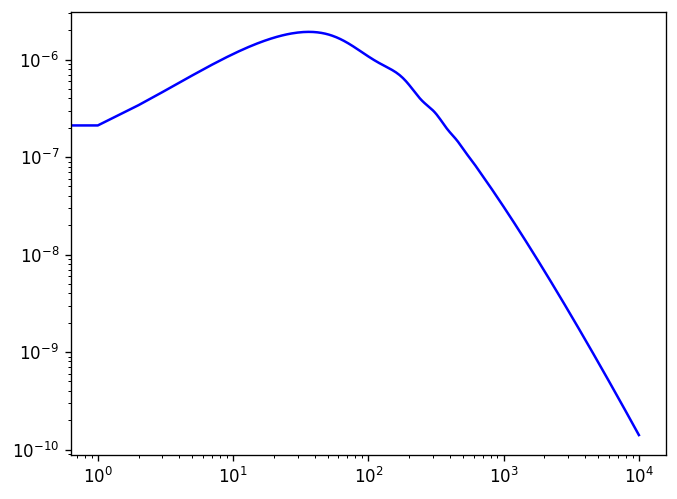

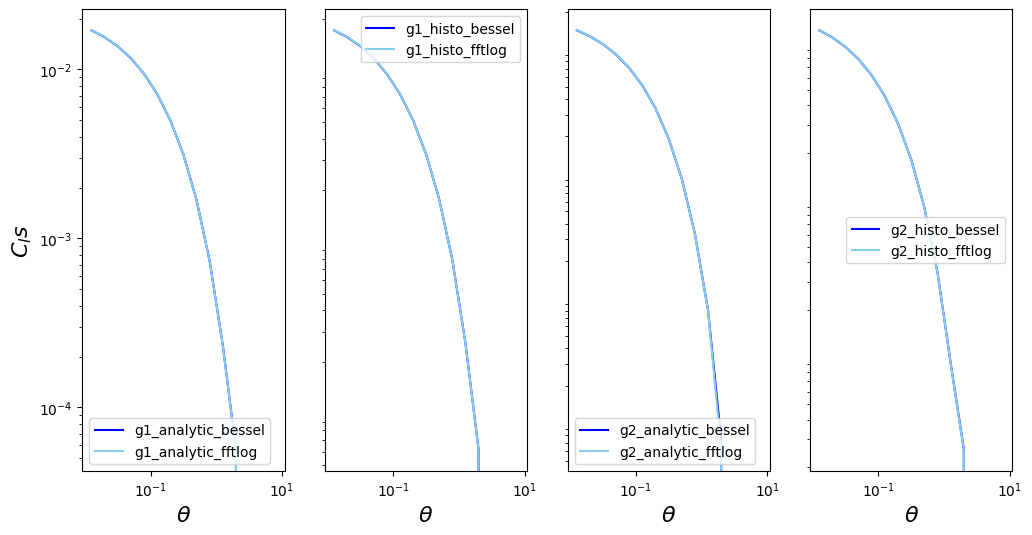

In [20]:


theta=[0.01258925,0.01995262,0.03162278,0.05011872,0.07943282,0.1258925,0.1995262,0.3162278,0.5011872,0.7943282,1.258925,1.995262,3.162278,5.011872,7.943282]


figs, axs = plt.subplots(nrows=1, ncols=4, sharex=True,figsize=(12, 6))

axs[0].plot(theta,g1_analytic_bessel, label='g1_analytic_bessel',color='b')
axs[0].plot(theta,g1_analytic_fftlog,label='g1_analytic_fftlog',color='skyblue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\theta$',fontsize=16)
axs[0].set_ylabel(r'$C_ls$',fontsize=16)
axs[0].legend()

axs[1].plot(theta,g1_histo_bessel, label='g1_histo_bessel',color='b')
axs[1].plot(theta,g1_histo_fftlog, label='g1_histo_fftlog',color='skyblue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\theta$',fontsize=16)
axs[1].set_yticks([])
axs[1].legend()

axs[2].plot(theta,g2_analytic_bessel, label='g2_analytic_bessel',color='b')
axs[2].plot(theta,g2_analytic_fftlog, label='g2_analytic_fftlog',color='skyblue')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$\theta$',fontsize=16)
axs[2].set_yticks([])
axs[2].legend()

axs[3].plot(theta,g2_histo_bessel, label='g2_histo_bessel',color='b')
axs[3].plot(theta,g2_histo_fftlog, label='g2_histo_fftlog',color='skyblue')
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel(r'$\theta$',fontsize=16)
axs[3].set_yticks([])
axs[3].legend()

##########################################################################
""" 

Attempt to graph the relative distance between the bessel method and the fftlog method
 below the graph of the representation of the Cls

axs[1,0].set_xlabel(r'$\theta$',fontsize=16)
axs[1,0].set_yscale('log')

axs[1,1].set_xlabel(r'$\theta$',fontsize=16)
axs[1,1].set_yscale('log')
axs[1,1].set_yticks([])
plt.show()


axs[1,2].set_xlabel(r'$\theta$',fontsize=16)
axs[1,2].set_yscale('log')
axs[1,2].set_yticks([])


axs[1,3].set_xlabel(r'$\theta$',fontsize=16)
axs[1,3].set_yscale('log')
axs[1,3].set_yticks([])
"""
plt.show()

Graphics of relative distances between Bessel method and Fftlog method.

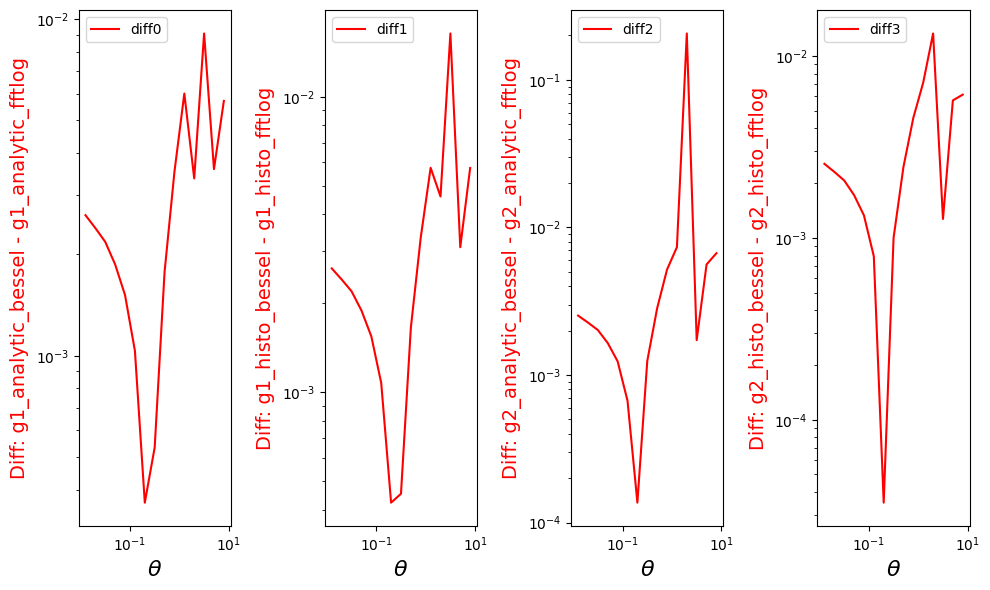

In [21]:
figs, axs = plt.subplots(nrows=1, ncols=4, sharex=True,figsize=(10, 6))

diff= { 'diff0':np.abs( (g1_analytic_bessel/g1_analytic_fftlog) -1 ),
        'diff1':np.abs( (g1_histo_bessel/g1_histo_fftlog) -1 ),
        'diff2':np.abs( (g2_analytic_bessel/g2_analytic_fftlog) -1 ),
        'diff3':np.abs( (g2_histo_bessel/g2_histo_fftlog)-1 )
}

axs[0].plot(theta,diff['diff0'], label='diff0',color='r')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\theta$',fontsize=16)
axs[0].set_ylabel('Diff: g1_analytic_bessel - g1_analytic_fftlog',fontsize=14,color='r')
axs[0].legend()

axs[1].plot(theta,diff['diff1'], label='diff1',color='r')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\theta$',fontsize=16)
axs[1].set_ylabel('Diff: g1_histo_bessel - g1_histo_fftlog',fontsize=14,color='r')
axs[1].legend()

axs[2].plot(theta,diff['diff2'], label='diff2',color='r')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$\theta$',fontsize=16)
axs[2].set_ylabel('Diff: g2_analytic_bessel - g2_analytic_fftlog',fontsize=14,color='r')
axs[2].legend()

axs[3].plot(theta,diff['diff3'], label='diff3',color='r')
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel(r'$\theta$',fontsize=16)
axs[3].set_ylabel('Diff: g2_histo_bessel - g2_histo_fftlog',fontsize=14,color='r')
axs[3].legend()
plt.tight_layout()
plt.show()

Comparing Cls of different tracers calculated using the same method.

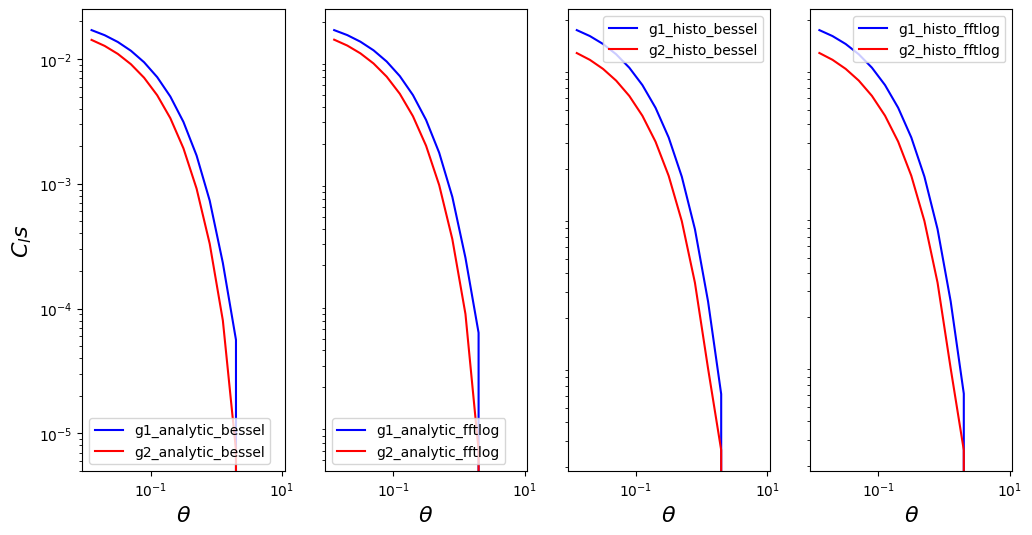

In [22]:
theta=[0.01258925,0.01995262,0.03162278,0.05011872,0.07943282,0.1258925,0.1995262,0.3162278,0.5011872,0.7943282,1.258925,1.995262,3.162278,5.011872,7.943282]


figs, axs = plt.subplots(nrows=1, ncols=4, sharex=True,figsize=(12, 6))

axs[0].plot(theta,g1_analytic_bessel, label='g1_analytic_bessel',color='b')
axs[0].plot(theta,g2_analytic_bessel,label='g2_analytic_bessel',color='r')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\theta$',fontsize=16)
axs[0].set_ylabel(r'$C_ls$',fontsize=16)
axs[0].legend()

axs[1].plot(theta,g1_analytic_fftlog, label='g1_analytic_fftlog',color='b')
axs[1].plot(theta,g2_analytic_fftlog, label='g2_analytic_fftlog',color='r')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\theta$',fontsize=16)
axs[1].set_yticks([])
axs[1].legend()

axs[2].plot(theta,g1_histo_bessel, label='g1_histo_bessel',color='b')
axs[2].plot(theta,g2_histo_bessel,label='g2_histo_bessel',color='r')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$\theta$',fontsize=16)
axs[2].set_yticks([])
axs[2].legend()

axs[3].plot(theta,g1_histo_fftlog, label='g1_histo_fftlog',color='b')
axs[3].plot(theta,g2_histo_fftlog, label='g2_histo_fftlog',color='r')
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel(r'$\theta$',fontsize=16)
axs[3].set_yticks([])
axs[3].legend()

plt.show()

In [ ]:
import pyccl as ccl
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#methods = ['fftlog','bessel']
#nztyp = ['analytic','histo']
#trc_typ = ['g1','g2'] <--'NN' is standard correlation type
def ccl_correlation(trc='g1',nztyp='analytic',method='bessel'):
    # Just used to stop the debug when the error is greater than the computation of cross correlation.
    if trc not in ['g1','g2']:
        raise ValueError("Trc_typ invalid", trc)

    if method not in ['fftlog','bessel']:
        raise ValueError("Method invalid!", method)
    
    w0 = -1.0
    wa = 0.0
    
    else:
        raise ValueError("Wrong Nz type " + nztyp)
    
    cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, "NcHICosmoDECpl{'massnu-length':<0>}")
    cosmo.omega_x2omega_k ()
    cosmo.param_set_by_name ("H0",        h * 100)
    cosmo.param_set_by_name ("Omegak",    0.0)
    cosmo.param_set_by_name ("w0",        w0)
    cosmo.param_set_by_name ("w1",        wa)
    cosmo.param_set_by_name ("Omegab",    Omega_b)
    cosmo.param_set_by_name ("Omegac",    Omega_c)
    cosmo.param_set_by_name ("ENnu",      Neff)
        
    # Set Omega_K in a consistent way
    Omega_k = cosmo.Omega_k0 ()
    Omega_v = cosmo.E2Omega_de (0.0)
    T_CMB   = cosmo.T_gamma0 ()
    
    hiprim = Nc.HIPrimPowerLaw.new ()
    hiprim.param_set_by_name ("ln10e10ASA", math.log (1.0e10 * A_s))
    hiprim.param_set_by_name ("n_SA",       n_s)
    
    cosmo.add_submodel (hiprim)
    
    dist = Nc.Distance.new (5.0)
    dist.prepare (cosmo)
    
    tf_eh = Nc.TransferFuncEH.new ()
    tf_eh.props.CCL_comp = True
    ps_eh = Nc.PowspecMLTransfer.new (tf_eh)
    ps_eh.prepare (cosmo)

    fact = (0.8 / ps_eh.sigma_tophat_R (cosmo, 1.0e-7, 0.0, 8.0 / cosmo.h ()))**2
    hiprim.param_set_by_name ("ln10e10ASA", math.log (1.0e10 * A_s * fact))

    ps_eh.prepare (cosmo)
    
    mset = Ncm.MSet.empty_new ()
    mset.set (cosmo)
    
    ccl_cosmo = ccl.Cosmology(
        Omega_c=Omega_c, Omega_b=Omega_b, Neff=Neff,
        h=h, n_s=n_s, Omega_k=Omega_k,
        w0=w0, wa=wa, Omega_g=0, sigma8 = 0.8,
        transfer_function='eisenstein_hu',
        T_CMB = T_CMB,
        matter_power_spectrum='linear')

    ccl_cosmo.cosmo.gsl_params.INTEGRATION_LIMBER_EPSREL = 2.5E-5
    ccl_cosmo.cosmo.gsl_params.INTEGRATION_EPSREL = 2.5E-5

    # Ell-dependent correction factors

    nc_g1 = None
    nc_g2 = None
    
    # Analytic case
    zmean_1 = 1.0
    sigz_1 = 0.15
    zmean_2 = 1.5
    sigz_2 = 0.15
    z1 = [0.2514648,0.2543945,0.2573242,0.2602539,0.2631836,0.2661133,0.269043,0.2719727,0.2749023,0.277832,0.2807617,0.2836914,0.2866211,0.2895508,0.2924805,0.2954102,0.2983398,0.3012695,0.3041992,0.3071289,0.3100586,0.3129883,0.315918,0.3188477,0.3217773,0.324707,0.3276367,0.3305664,0.3334961,0.3364258,0.3393555,0.3422852,0.3452148,0.3481445,0.3510742,0.3540039,0.3569336,0.3598633,0.362793,0.3657227,0.3686523,0.371582,0.3745117,0.3774414,0.3803711,0.3833008,0.3862305,0.3891602,0.3920898,0.3950195,0.3979492,0.4008789,0.4038086,0.4067383,0.409668,0.4125977,0.4155273,0.418457,0.4213867,0.4243164,0.4272461,0.4301758,0.4331055,0.4360352,0.4389648,0.4418945,0.4448242,0.4477539,0.4506836,0.4536133,0.456543,0.4594727,0.4624023,0.465332,0.4682617,0.4711914,0.4741211,0.4770508,0.4799805,0.4829102,0.4858398,0.4887695,0.4916992,0.4946289,0.4975586,0.5004883,0.503418,0.5063477,0.5092773,0.512207,0.5151367,0.5180664,0.5209961,0.5239258,0.5268555,0.5297852,0.5327148,0.5356445,0.5385742,0.5415039,0.5444336,0.5473633,0.550293,0.5532227,0.5561523,0.559082,0.5620117,0.5649414,0.5678711,0.5708008,0.5737305,0.5766602,0.5795898,0.5825195,0.5854492,0.5883789,0.5913086,0.5942383,0.597168,0.6000977,0.6030273,0.605957,0.6088867,0.6118164,0.6147461,0.6176758,0.6206055,0.6235352,0.6264648,0.6293945,0.6323242,0.6352539,0.6381836,0.6411133,0.644043,0.6469727,0.6499023,0.652832,0.6557617,0.6586914,0.6616211,0.6645508,0.6674805,0.6704102,0.6733398,0.6762695,0.6791992,0.6821289,0.6850586,0.6879883,0.690918,0.6938477,0.6967773,0.699707,0.7026367,0.7055664,0.7084961,0.7114258,0.7143555,0.7172852,0.7202148,0.7231445,0.7260742,0.7290039,0.7319336,0.7348633,0.737793,0.7407227,0.7436523,0.746582,0.7495117,0.7524414,0.7553711,0.7583008,0.7612305,0.7641602,0.7670898,0.7700195,0.7729492,0.7758789,0.7788086,0.7817383,0.784668,0.7875977,0.7905273,0.793457,0.7963867,0.7993164,0.8022461,0.8051758,0.8081055,0.8110352,0.8139648,0.8168945,0.8198242,0.8227539,0.8256836,0.8286133,0.831543,0.8344727,0.8374023,0.840332,0.8432617,0.8461914,0.8491211,0.8520508,0.8549805,0.8579102,0.8608398,0.8637695,0.8666992,0.8696289,0.8725586,0.8754883,0.878418,0.8813477,0.8842773,0.887207,0.8901367,0.8930664,0.8959961,0.8989258,0.9018555,0.9047852,0.9077148,0.9106445,0.9135742,0.9165039,0.9194336,0.9223633,0.925293,0.9282227,0.9311523,0.934082,0.9370117,0.9399414,0.9428711,0.9458008,0.9487305,0.9516602,0.9545898,0.9575195,0.9604492,0.9633789,0.9663086,0.9692383,0.972168,0.9750977,0.9780273,0.980957,0.9838867,0.9868164,0.9897461,0.9926758,0.9956055,0.9985352,1.001465,1.004395,1.007324,1.010254,1.013184,1.016113,1.019043,1.021973,1.024902,1.027832,1.030762,1.033691,1.036621,1.039551,1.04248,1.04541,1.04834,1.05127,1.054199,1.057129,1.060059,1.062988,1.065918,1.068848,1.071777,1.074707,1.077637,1.080566,1.083496,1.086426,1.089355,1.092285,1.095215,1.098145,1.101074,1.104004,1.106934,1.109863,1.112793,1.115723,1.118652,1.121582,1.124512,1.127441,1.130371,1.133301,1.13623,1.13916,1.14209,1.14502,1.147949,1.150879,1.153809,1.156738,1.159668,1.162598,1.165527,1.168457,1.171387,1.174316,1.177246,1.180176,1.183105,1.186035,1.188965,1.191895,1.194824,1.197754,1.200684,1.203613,1.206543,1.209473,1.212402,1.215332,1.218262,1.221191,1.224121,1.227051,1.22998,1.23291,1.23584,1.23877,1.241699,1.244629,1.247559,1.250488,1.253418,1.256348,1.259277,1.262207,1.265137,1.268066,1.270996,1.273926,1.276855,1.279785,1.282715,1.285645,1.288574,1.291504,1.294434,1.297363,1.300293,1.303223,1.306152,1.309082,1.312012,1.314941,1.317871,1.320801,1.32373,1.32666,1.32959,1.33252,1.335449,1.338379,1.341309,1.344238,1.347168,1.350098,1.353027,1.355957,1.358887,1.361816,1.364746,1.367676,1.370605,1.373535,1.376465,1.379395,1.382324,1.385254,1.388184,1.391113,1.394043,1.396973,1.399902,1.402832,1.405762,1.408691,1.411621,1.414551,1.41748,1.42041,1.42334,1.42627,1.429199,1.432129,1.435059,1.437988,1.440918,1.443848,1.446777,1.449707,1.452637,1.455566,1.458496,1.461426,1.464355,1.467285,1.470215,1.473145,1.476074,1.479004,1.481934,1.484863,1.487793,1.490723,1.493652,1.496582,1.499512,1.502441,1.505371,1.508301,1.51123,1.51416,1.51709,1.52002,1.522949,1.525879,1.528809,1.531738,1.534668,1.537598,1.540527,1.543457,1.546387,1.549316,1.552246,1.555176,1.558105,1.561035,1.563965,1.566895,1.569824,1.572754,1.575684,1.578613,1.581543,1.584473,1.587402,1.590332,1.593262,1.596191,1.599121,1.602051,1.60498,1.60791,1.61084,1.61377,1.616699,1.619629,1.622559,1.625488,1.628418,1.631348,1.634277,1.637207,1.640137,1.643066,1.645996,1.648926,1.651855,1.654785,1.657715,1.660645,1.663574,1.666504,1.669434,1.672363,1.675293,1.678223,1.681152,1.684082,1.687012,1.689941,1.692871,1.695801,1.69873,1.70166,1.70459,1.70752,1.710449,1.713379,1.716309,1.719238,1.722168,1.725098,1.728027,1.730957,1.733887,1.736816,1.739746,1.742676,1.745605,1.748535]
    z2 = [0.7514648,0.7543945,0.7573242,0.7602539,0.7631836,0.7661133,0.769043,0.7719727,0.7749023,0.777832,0.7807617,0.7836914,0.7866211,0.7895508,0.7924805,0.7954102,0.7983398,0.8012695,0.8041992,0.8071289,0.8100586,0.8129883,0.815918,0.8188477,0.8217773,0.824707,0.8276367,0.8305664,0.8334961,0.8364258,0.8393555,0.8422852,0.8452148,0.8481445,0.8510742,0.8540039,0.8569336,0.8598633,0.862793,0.8657227,0.8686523,0.871582,0.8745117,0.8774414,0.8803711,0.8833008,0.8862305,0.8891602,0.8920898,0.8950195,0.8979492,0.9008789,0.9038086,0.9067383,0.909668,0.9125977,0.9155273,0.918457,0.9213867,0.9243164,0.9272461,0.9301758,0.9331055,0.9360352,0.9389648,0.9418945,0.9448242,0.9477539,0.9506836,0.9536133,0.956543,0.9594727,0.9624023,0.965332,0.9682617,0.9711914,0.9741211,0.9770508,0.9799805,0.9829102,0.9858398,0.9887695,0.9916992,0.9946289,0.9975586,1.000488,1.003418,1.006348,1.009277,1.012207,1.015137,1.018066,1.020996,1.023926,1.026855,1.029785,1.032715,1.035645,1.038574,1.041504,1.044434,1.047363,1.050293,1.053223,1.056152,1.059082,1.062012,1.064941,1.067871,1.070801,1.07373,1.07666,1.07959,1.08252,1.085449,1.088379,1.091309,1.094238,1.097168,1.100098,1.103027,1.105957,1.108887,1.111816,1.114746,1.117676,1.120605,1.123535,1.126465,1.129395,1.132324,1.135254,1.138184,1.141113,1.144043,1.146973,1.149902,1.152832,1.155762,1.158691,1.161621,1.164551,1.16748,1.17041,1.17334,1.17627,1.179199,1.182129,1.185059,1.187988,1.190918,1.193848,1.196777,1.199707,1.202637,1.205566,1.208496,1.211426,1.214355,1.217285,1.220215,1.223145,1.226074,1.229004,1.231934,1.234863,1.237793,1.240723,1.243652,1.246582,1.249512,1.252441,1.255371,1.258301,1.26123,1.26416,1.26709,1.27002,1.272949,1.275879,1.278809,1.281738,1.284668,1.287598,1.290527,1.293457,1.296387,1.299316,1.302246,1.305176,1.308105,1.311035,1.313965,1.316895,1.319824,1.322754,1.325684,1.328613,1.331543,1.334473,1.337402,1.340332,1.343262,1.346191,1.349121,1.352051,1.35498,1.35791,1.36084,1.36377,1.366699,1.369629,1.372559,1.375488,1.378418,1.381348,1.384277,1.387207,1.390137,1.393066,1.395996,1.398926,1.401855,1.404785,1.407715,1.410645,1.413574,1.416504,1.419434,1.422363,1.425293,1.428223,1.431152,1.434082,1.437012,1.439941,1.442871,1.445801,1.44873,1.45166,1.45459,1.45752,1.460449,1.463379,1.466309,1.469238,1.472168,1.475098,1.478027,1.480957,1.483887,1.486816,1.489746,1.492676,1.495605,1.498535,1.501465,1.504395,1.507324,1.510254,1.513184,1.516113,1.519043,1.521973,1.524902,1.527832,1.530762,1.533691,1.536621,1.539551,1.54248,1.54541,1.54834,1.55127,1.554199,1.557129,1.560059,1.562988,1.565918,1.568848,1.571777,1.574707,1.577637,1.580566,1.583496,1.586426,1.589355,1.592285,1.595215,1.598145,1.601074,1.604004,1.606934,1.609863,1.612793,1.615723,1.618652,1.621582,1.624512,1.627441,1.630371,1.633301,1.63623,1.63916,1.64209,1.64502,1.647949,1.650879,1.653809,1.656738,1.659668,1.662598,1.665527,1.668457,1.671387,1.674316,1.677246,1.680176,1.683105,1.686035,1.688965,1.691895,1.694824,1.697754,1.700684,1.703613,1.706543,1.709473,1.712402,1.715332,1.718262,1.721191,1.724121,1.727051,1.72998,1.73291,1.73584,1.73877,1.741699,1.744629,1.747559,1.750488,1.753418,1.756348,1.759277,1.762207,1.765137,1.768066,1.770996,1.773926,1.776855,1.779785,1.782715,1.785645,1.788574,1.791504,1.794434,1.797363,1.800293,1.803223,1.806152,1.809082,1.812012,1.814941,1.817871,1.820801,1.82373,1.82666,1.82959,1.83252,1.835449,1.838379,1.841309,1.844238,1.847168,1.850098,1.853027,1.855957,1.858887,1.861816,1.864746,1.867676,1.870605,1.873535,1.876465,1.879395,1.882324,1.885254,1.888184,1.891113,1.894043,1.896973,1.899902,1.902832,1.905762,1.908691,1.911621,1.914551,1.91748,1.92041,1.92334,1.92627,1.929199,1.932129,1.935059,1.937988,1.940918,1.943848,1.946777,1.949707,1.952637,1.955566,1.958496,1.961426,1.964355,1.967285,1.970215,1.973145,1.976074,1.979004,1.981934,1.984863,1.987793,1.990723,1.993652,1.996582,1.999512,2.002441,2.005371,2.008301,2.01123,2.01416,2.01709,2.02002,2.022949,2.025879,2.028809,2.031738,2.034668,2.037598,2.040527,2.043457,2.046387,2.049316,2.052246,2.055176,2.058105,2.061035,2.063965,2.066895,2.069824,2.072754,2.075684,2.078613,2.081543,2.084473,2.087402,2.090332,2.093262,2.096191,2.099121,2.102051,2.10498,2.10791,2.11084,2.11377,2.116699,2.119629,2.122559,2.125488,2.128418,2.131348,2.134277,2.137207,2.140137,2.143066,2.145996,2.148926,2.151855,2.154785,2.157715,2.160645,2.163574,2.166504,2.169434,2.172363,2.175293,2.178223,2.181152,2.184082,2.187012,2.189941,2.192871,2.195801,2.19873,2.20166,2.20459,2.20752,2.210449,2.213379,2.216309,2.219238,2.222168,2.225098,2.228027,2.230957,2.233887,2.236816,2.239746,2.242676,2.245605,2.248535]
    z1=np.array(z1)
    z2=np.array(z2)
    pz1 = np.exp(-0.5 * ((z1 - zmean_1) / sigz_1) ** 2)
    pz2 = np.exp(-0.5 * ((z2 - zmean_2) / sigz_2) ** 2)

    v_z1  = Ncm.Vector.new_array (z1)
    v_pz1 = Ncm.Vector.new_array (pz1)
    v_pz2 = Ncm.Vector.new_array (pz2)
        
    s_pz1 = Ncm.SplineCubicNotaknot.new_full (v_z1, v_pz1, True)
    s_pz2 = Ncm.SplineCubicNotaknot.new_full (v_z1, v_pz2, True)
                
    nc_g1 = Nc.XcorLimberKernelGal.new (z1[0], z1[-1], 1, 0.0, s_pz1, dist, False)
    nc_g2 = Nc.XcorLimberKernelGal.new (z1[0], z1[-1], 1, 0.0, s_pz2, dist, False)
        
    mset.push (nc_g1)
    mset.push (nc_g2)
    
    xcor = Nc.Xcor.new (dist, ps_eh, Nc.XcorLimberMethod.CVODE)
    
    vp = Ncm.Vector.new (lmax + 1)
    
    xcor.prepare (cosmo)
    if nc_g1 and nc_g2:
        nc_g1.prepare (cosmo)
        xcor.limber (nc_g1, nc_g1, cosmo, 0, lmax, vp)
    
    bz = np.ones_like(pz1)

    # Initialize tracers
    trcs = dict()
    trcs['g1'] = ccl.NumberCountsTracer(ccl_cosmo, False,
                                       (z1, pz1),
                                       (z2, bz))
    trcs['g2'] = ccl.NumberCountsTracer(ccl_cosmo, False,
                                       (z2, pz2),
                                       (z2, bz))
    theta=[0.01258925,0.01995262,0.03162278,0.05011872,0.07943282,0.1258925,0.1995262,0.3162278,0.5011872,0.7943282,1.258925,1.995262,3.162278,5.011872,7.943282]
    cl = ccl.angular_cl(ccl_cosmo, trcs[trc], trcs[trc], ells)
    ell = np.arange(lmax)
    cli = interp1d(ells, cl, kind='cubic')(ell)

    vp.log_vals ("CLs", "% 22.15g", True)
    mset.pretty_log ()
    
    xi = ccl.correlation(ccl_cosmo, ell, cli, theta, type='NN', method=method)
    return xi, ells, cl, vp